## Topic Name : Banking and Marketing Campaigns success prediction

### Domain Knowledge:

## Business Problem: 

## Problem Statement

## Import Labraries

In [1]:
# lib for extraction, manipulation, analysis
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for vif # Check For Multicollinearity in Data 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

## RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# For Warnings
import warnings
warnings.filterwarnings('ignore')

# SVM 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## KNN 
from sklearn.neighbors import KNeighborsClassifier 

## Navie Bayes
from sklearn.naive_bayes import BernoulliNB 


### Data Gathering

In [2]:
df = pd.read_csv(r"C:\Users\riyac\Downloads\archive (3)\Bank Target Marketing Dataset.csv")
df

age           job   marital  education default  balance housing loan  \
0       59        admin.   married  secondary      no     2343     yes   no   
1       56        admin.   married  secondary      no       45      no   no   
2       41    technician   married  secondary      no     1270     yes   no   
3       55      services   married  secondary      no     2476     yes   no   
4       54        admin.   married   tertiary      no      184      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
56368   51    technician   married   tertiary      no      825      no   no   
56369   71       retired  divorced    primary      no     1729      no   no   
56370   72       retired   married  secondary      no     5715      no   no   
56371   57   blue-collar   married  secondary      no      668      no   no   
56372   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may      1042         1     -1         0  unknown   
1        unknown    5   may      1467         1     -1         0  unknown   
2        unknown    5   may      1389         1     -1         0  unknown   
3        unknown    5   may       579         1     -1         0  unknown   
4        unknown    5   may       673         2     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
56368   cellular   17   nov       977         3     -1         0  unknown   
56369   cellular   17   nov       456         2     -1         0  unknown   
56370   cellular   17   nov      1127         5    184         3  success   
56371  telephone   17   nov       508         4     -1         0  unknown   
56372   cellular   17   nov       361         2    188        11    other   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
56368     yes  
56369     yes  
56370     yes  
56371      no  
56372      no  

[56373 rows x 17 columns]

### EDA - Exploratory Data Analysis

In [4]:
## Check for first 5 columns 

df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [5]:
## Check for no of rows and columns 

df.shape

(56373, 17)

In [6]:
## check for Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB


In [12]:
## Check for size 

df.size

958341

In [14]:
## Check for missing value 

df.isna().sum()  ## There is no missing value 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [16]:
##  Checking for stats

df.describe()   

age        balance           day      duration      campaign  \
count  56373.000000   56373.000000  56373.000000  56373.000000  56373.000000   
mean      40.994767    1395.193249     15.777039    280.701861      2.713267   
std       10.887854    3082.058457      8.342159    281.253563      3.028980   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      81.000000      8.000000    108.000000      1.000000   
50%       39.000000     469.000000     16.000000    192.000000      2.000000   
75%       49.000000    1489.000000     21.000000    346.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  56373.000000  56373.000000  
mean      42.402107      0.630266  
std      101.990991      2.303356  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [18]:
# check for columns datatype

df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

## Analysis for Numerical column

Column: age
Mean: 40.99476699838575
Median: 39.0
Mode: 32
Skewness: 0.736422192146104
Variance: 118.5453674920988


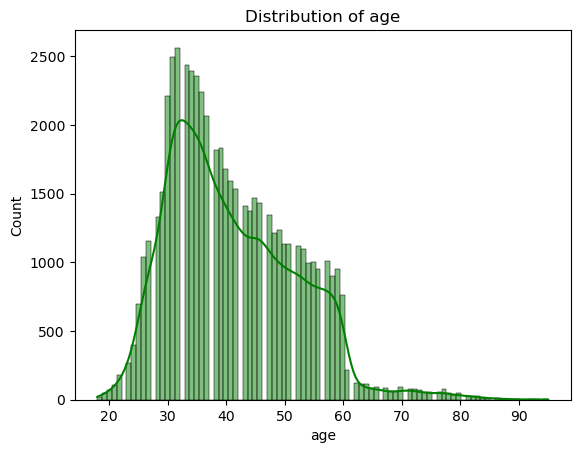

Column: balance
Mean: 1395.1932485409682
Median: 469.0
Mode: 0
Skewness: 8.333547925254615
Variance: 9499084.331914755


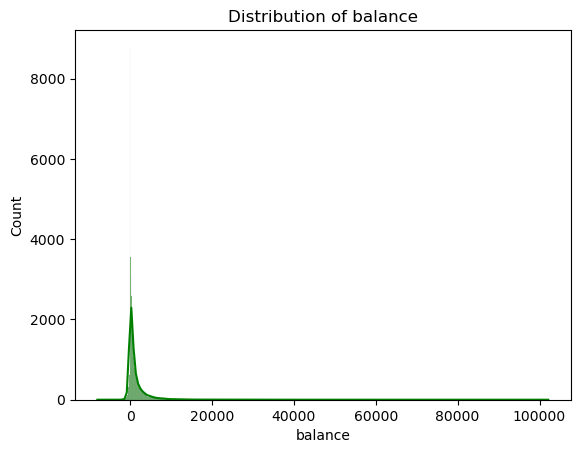

Column: day
Mean: 15.77703865325599
Median: 16.0
Mode: 20
Skewness: 0.09658826433926047
Variance: 69.5916163845965


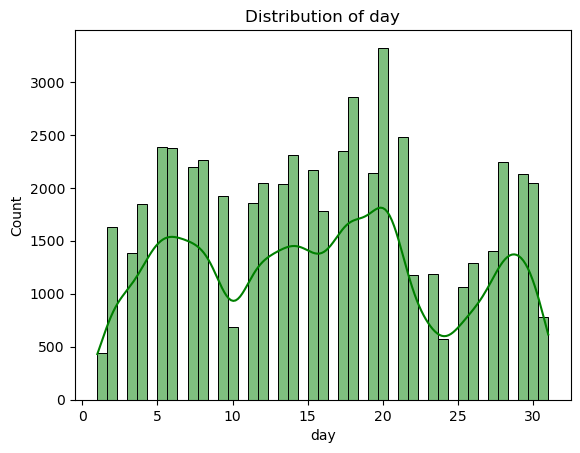

Column: duration
Mean: 280.70186081989607
Median: 192.0
Mode: 124
Skewness: 2.872089451518836
Variance: 79103.56641905171


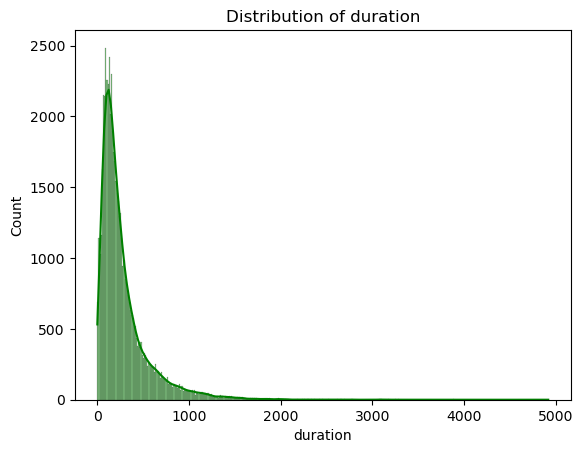

Column: campaign
Mean: 2.7132669895162578
Median: 2.0
Mode: 1
Skewness: 5.009767646102755
Variance: 9.174718789799199


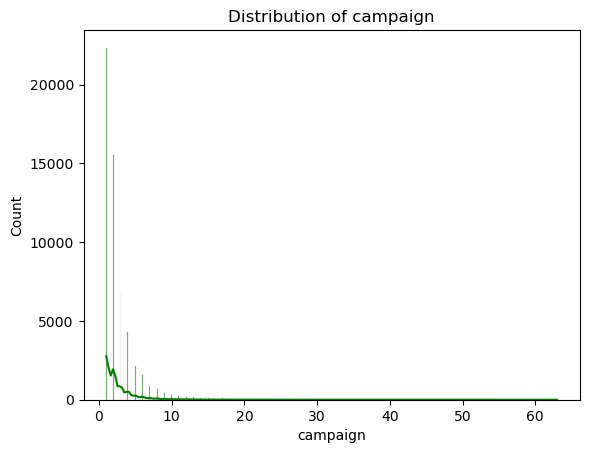

Column: pdays
Mean: 42.402107391836516
Median: -1.0
Mode: -1
Skewness: 2.582165968350515
Variance: 10402.162190979427


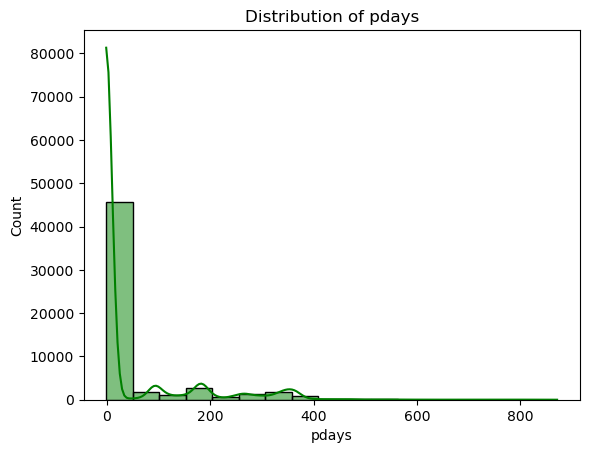

Column: previous
Mean: 0.6302662622177283
Median: 0.0
Mode: 0
Skewness: 34.99438900186074
Variance: 5.3054466703925165


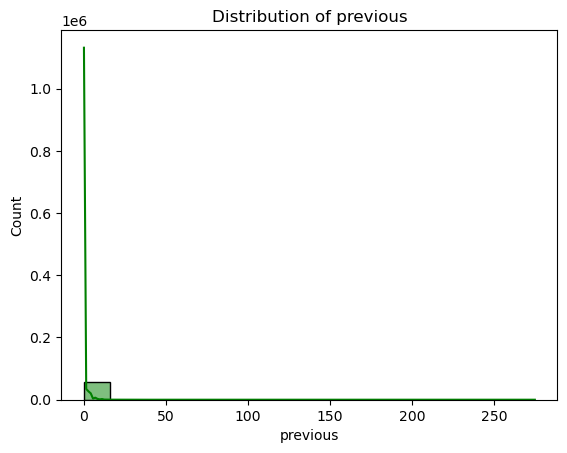

In [21]:
# analysis of numerical columns
def numerical_analysis(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        print(f'Column: {col}')
        print(f'Mean: {df[col].mean()}')
        print(f'Median: {df[col].median()}')
        print(f'Mode: {df[col].mode()[0]}')
        print(f'Skewness: {df[col].skew()}')
        print(f'Variance: {df[col].var()}')
        sns.histplot(df[col], kde=True, color='green')
        plt.title(f'Distribution of {col}')
        plt.show()

numerical_analysis(df)

In [22]:
# Function for univariate analysis of numerical columns
def univariate_analysis_numerical(data):
    """Analyze numerical columns: distribution, mean, median, mode, skewness, variance"""
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        print(f"\nAnalysis for {col}:\n")
        print(f"Mean: {data[col].mean()}")
        print(f"Median: {data[col].median()}")
        print(f"Mode: {data[col].mode()[0]}")
        print(f"Skewness: {data[col].skew()}")
        print(f"Variance: {data[col].var()}")
       # Density plot
        sns.kdeplot(data[col], shade=True, color='purple')
        plt.title(f"Density Plot for {col}")
        plt.show()




Analysis for age:

Mean: 40.99476699838575
Median: 39.0
Mode: 32
Skewness: 0.736422192146104
Variance: 118.5453674920988


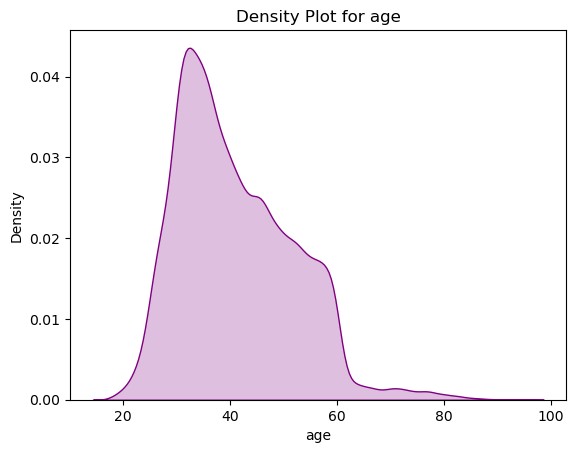


Analysis for balance:

Mean: 1395.1932485409682
Median: 469.0
Mode: 0
Skewness: 8.333547925254615
Variance: 9499084.331914755


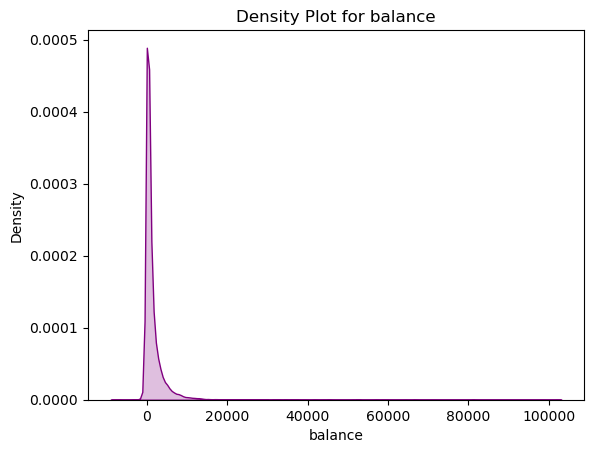


Analysis for day:

Mean: 15.77703865325599
Median: 16.0
Mode: 20
Skewness: 0.09658826433926047
Variance: 69.5916163845965


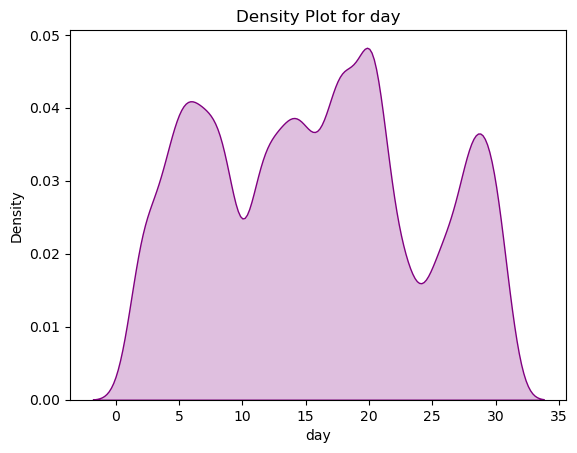


Analysis for duration:

Mean: 280.70186081989607
Median: 192.0
Mode: 124
Skewness: 2.872089451518836
Variance: 79103.56641905171


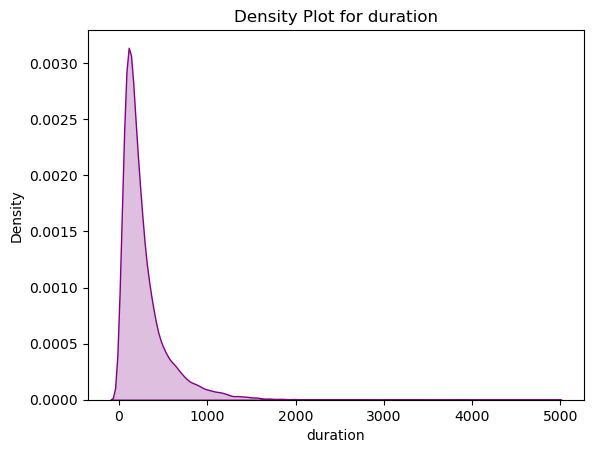


Analysis for campaign:

Mean: 2.7132669895162578
Median: 2.0
Mode: 1
Skewness: 5.009767646102755
Variance: 9.174718789799199


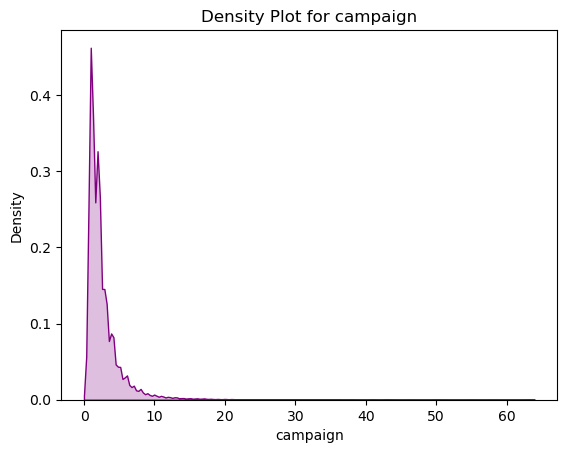


Analysis for pdays:

Mean: 42.402107391836516
Median: -1.0
Mode: -1
Skewness: 2.582165968350515
Variance: 10402.162190979427


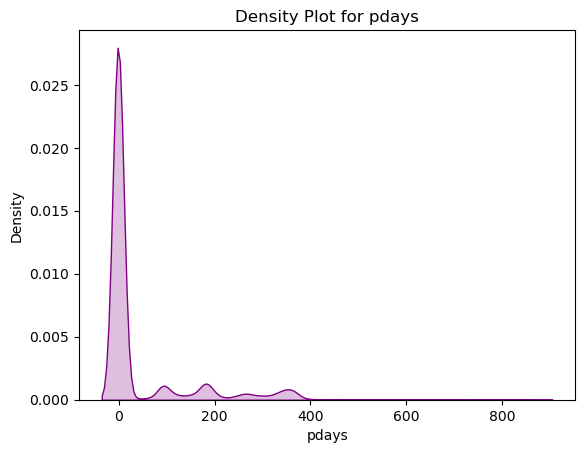


Analysis for previous:

Mean: 0.6302662622177283
Median: 0.0
Mode: 0
Skewness: 34.99438900186074
Variance: 5.3054466703925165


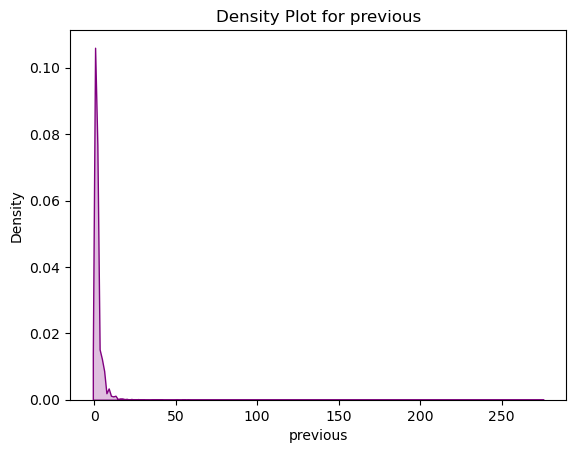

In [28]:
univariate_analysis_numerical(df)

# Strip plot for age and balance

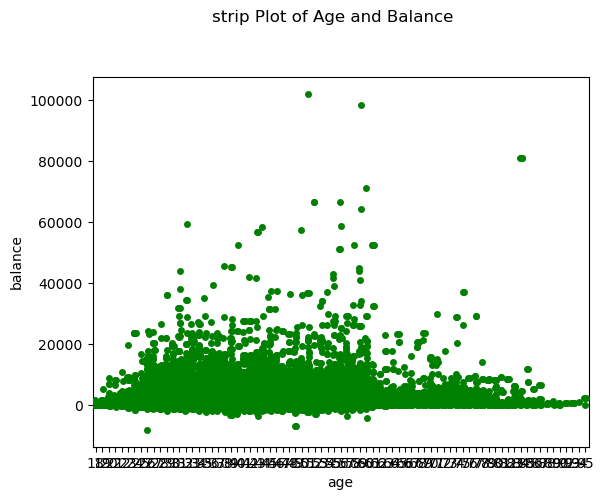

In [25]:
# Strip plot for age and balance
sns.stripplot(x='age', y='balance', data=df, jitter=0.2,color = "Green")
plt.suptitle('strip Plot of Age and Balance', y=1.02)
plt.show()

## Scatter Plots with Regression Lines   

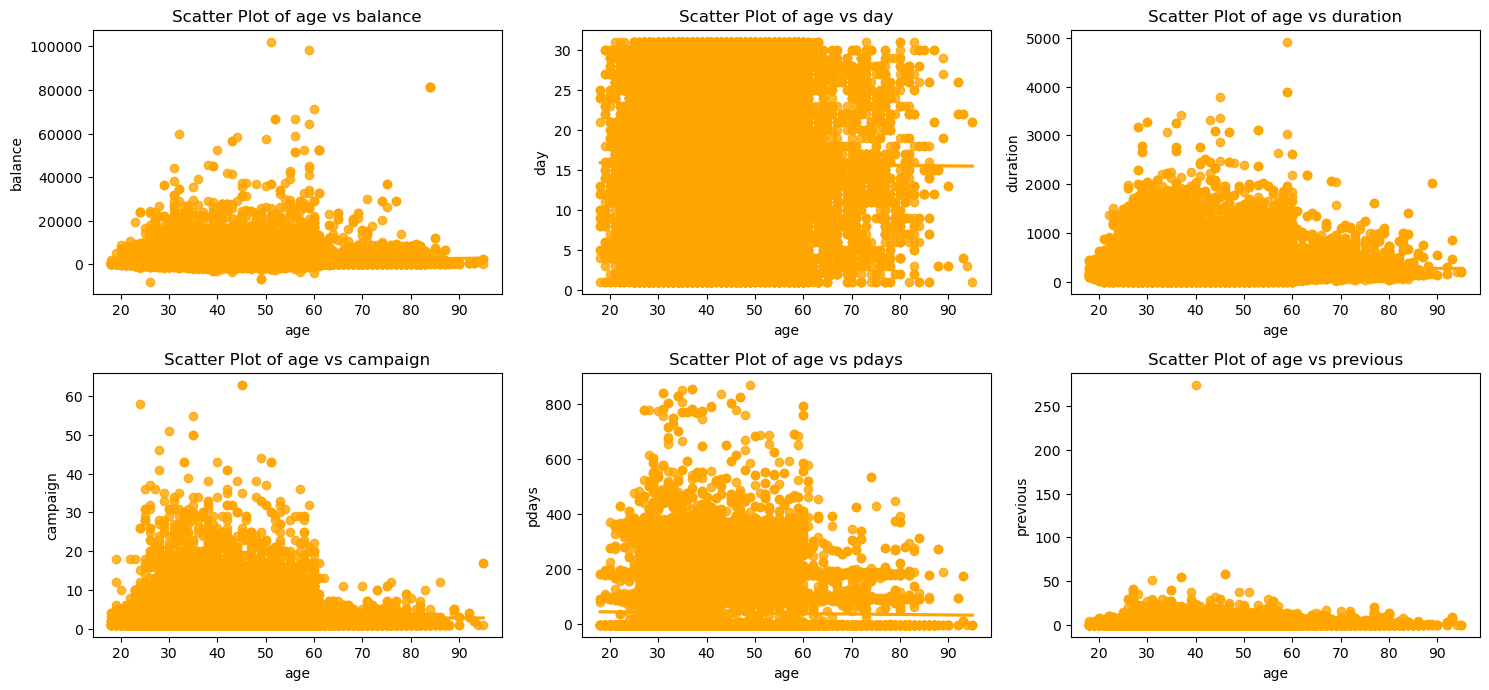

In [27]:

# Define numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Set the figure size
plt.figure(figsize=(15, 10))

# Scatter plots with regression lines
for i, column in enumerate(numerical_columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=df['age'], y=df[column], color='orange')  # Setting the color to orange
    plt.title(f'Scatter Plot of age vs {column}')
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## Correlation Heatmap
## A correlation heatmap helps in understanding the relationships between numerical variables.

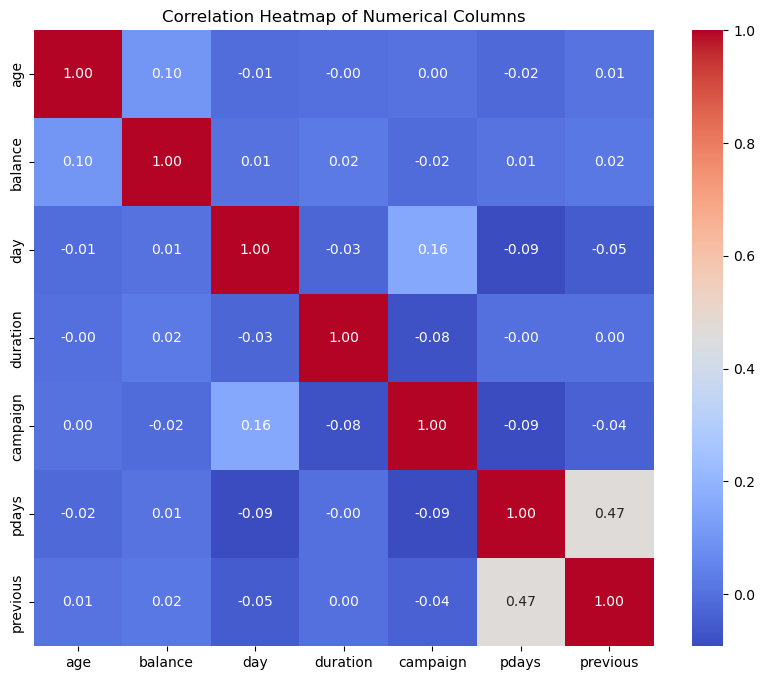

In [29]:
# Calculate correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [30]:
## Checking_and_Handling_Of_Outliers

def Checking_and_Handling_Of_Outliers(df, col):
    sns.boxplot(df[col], color = "green")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)
    #HAndling of Outliers :
    df.loc[df[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    df.loc[df[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value
    print("After handling of Outliers data:\n")    
    print(df.head())

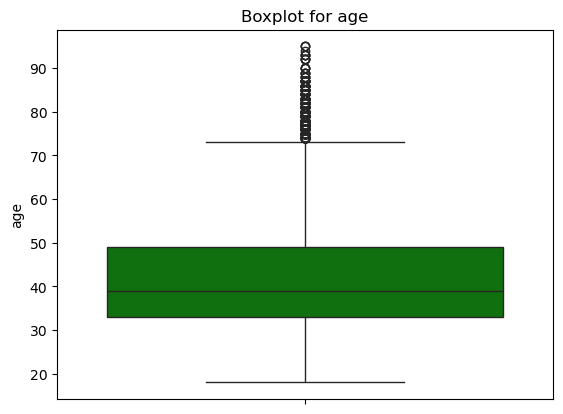

25% Quantile q1 = 33.0
75% Quantile q3 = 49.0
IQR = 16.0

--------------------------------------------------------------------------------
Lower Tail = 9.0
Upper Tail = 73.0
--------------------------------------------------------------------------------

Outliers :
        age         job   marital  education default  balance housing loan  \
1162    75     retired  divorced    primary      no     3881     yes   no   
1236    85     retired   married    primary      no    12114      no   no   
1243    90     retired  divorced  secondary      no        1      no   no   
1258    74     retired   married  secondary      no     1714      no   no   
1274    85     retired  divorced    primary      no     7613      no   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
56263   74     retired   married  secondary      no      935      no   no   
56271   78  management   married    unknown      no     1780     yes   no   
56280   78     retired   married    pri

In [46]:
Checking_and_Handling_Of_Outliers(df,'age')

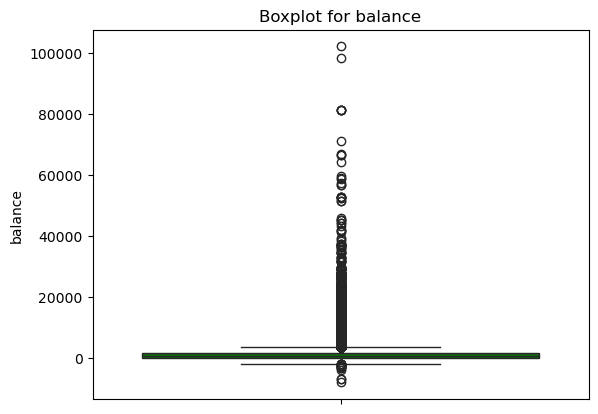

25% Quantile q1 = 81.0
75% Quantile q3 = 1489.0
IQR = 1408.0

--------------------------------------------------------------------------------
Lower Tail = -2031.0
Upper Tail = 3601.0
--------------------------------------------------------------------------------

Outliers :
        age          job   marital  education default  balance housing loan  \
9       28     services    single  secondary      no     5090     yes   no   
15      35   management  divorced   tertiary      no     3837     yes   no   
47      52    housemaid   married  secondary      no     3923     yes   no   
58      40   technician    single    unknown      no     3652     yes   no   
60      51  blue-collar   married  secondary      no     7180     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
56326   35     services   married   tertiary      no     4655      no   no   
56343   46  blue-collar   married  secondary      no     6879      no   no   
56347   60     servi

In [48]:
Checking_and_Handling_Of_Outliers(df,'balance')

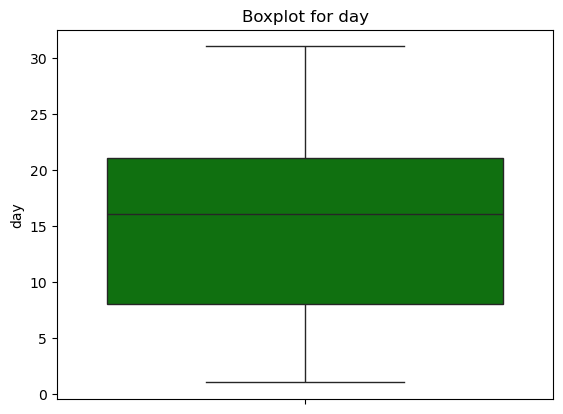

25% Quantile q1 = 8.0
75% Quantile q3 = 21.0
IQR = 13.0

--------------------------------------------------------------------------------
Lower Tail = -11.5
Upper Tail = 40.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, deposit]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   terti

In [49]:
Checking_and_Handling_Of_Outliers(df,'day')

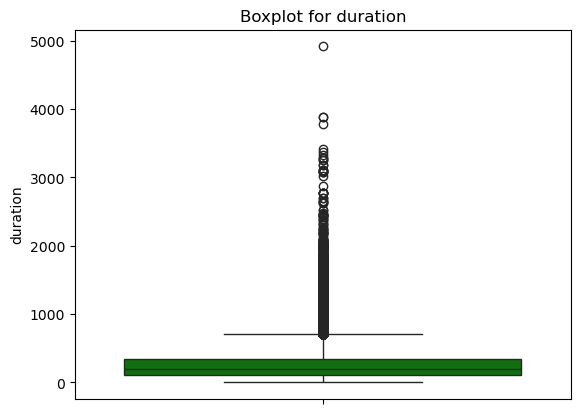

25% Quantile q1 = 108.0
75% Quantile q3 = 346.0
IQR = 238.0

--------------------------------------------------------------------------------
Lower Tail = -249.0
Upper Tail = 703.0
--------------------------------------------------------------------------------

Outliers :
        age          job   marital  education default  balance housing loan  \
0       59       admin.   married  secondary      no     2343     yes   no   
1       56       admin.   married  secondary      no       45      no   no   
2       41   technician   married  secondary      no     1270     yes   no   
6       56   management   married   tertiary      no      830     yes  yes   
7       60      retired  divorced  secondary      no      545     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
56247   25   technician    single  secondary      no      325      no   no   
56361   34  blue-collar    single  secondary      no     1475     yes   no   
56362   38   technician

In [51]:
Checking_and_Handling_Of_Outliers(df,'duration')

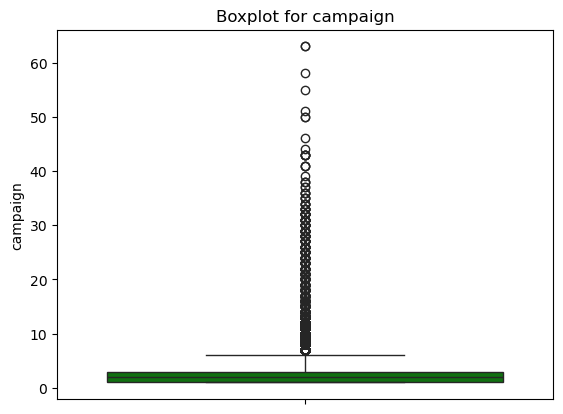

25% Quantile q1 = 1.0
75% Quantile q3 = 3.0
IQR = 2.0

--------------------------------------------------------------------------------
Lower Tail = -2.0
Upper Tail = 6.0
--------------------------------------------------------------------------------

Outliers :
        age            job   marital  education default  balance housing loan  \
125     35    blue-collar   married    primary      no      994     yes   no   
135     44     technician  divorced  secondary      no     1262     yes   no   
163     51   entrepreneur   married    unknown      no      606     yes   no   
186     35     technician  divorced  secondary      no     3601     yes   no   
187     34     technician  divorced  secondary      no     1451     yes   no   
...    ...            ...       ...        ...     ...      ...     ...  ...   
55828   25     technician    single  secondary      no     1298      no   no   
55842   27  self-employed    single   tertiary      no      560      no   no   
55932   37     

In [53]:
Checking_and_Handling_Of_Outliers(df,'campaign')

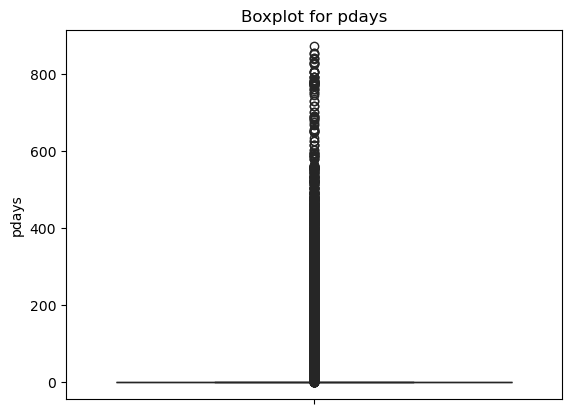

25% Quantile q1 = -1.0
75% Quantile q3 = -1.0
IQR = 0.0

--------------------------------------------------------------------------------
Lower Tail = -1.0
Upper Tail = -1.0
--------------------------------------------------------------------------------

Outliers :
        age           job  marital  education default  balance housing loan  \
890     42        admin.   single  secondary      no     -247     yes  yes   
891     33      services  married  secondary      no     3444     yes   no   
899     56    technician  married  secondary      no      589     yes   no   
933     34        admin.  married   tertiary      no      899     yes   no   
951     53       retired  married   tertiary      no     2269      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
56361   34   blue-collar   single  secondary      no     1475     yes   no   
56363   53    management  married   tertiary      no      583      no   no   
56366   73       retired  marr

In [54]:
Checking_and_Handling_Of_Outliers(df,'pdays')

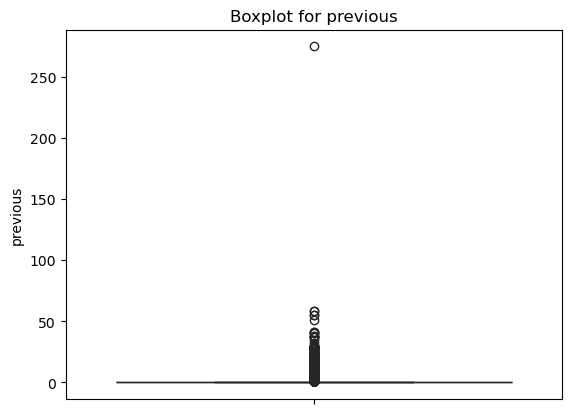

25% Quantile q1 = 0.0
75% Quantile q3 = 0.0
IQR = 0.0

--------------------------------------------------------------------------------
Lower Tail = 0.0
Upper Tail = 0.0
--------------------------------------------------------------------------------

Outliers :
        age           job  marital  education default  balance housing loan  \
890     42        admin.   single  secondary      no     -247     yes  yes   
891     33      services  married  secondary      no     3444     yes   no   
899     56    technician  married  secondary      no      589     yes   no   
933     34        admin.  married   tertiary      no      899     yes   no   
951     53       retired  married   tertiary      no     2269      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
56361   34   blue-collar   single  secondary      no     1475     yes   no   
56363   53    management  married   tertiary      no      583      no   no   
56366   73       retired  married 

In [56]:
Checking_and_Handling_Of_Outliers(df,'previous')

# Analysis of categorical columns

Column: job
Number of unique values: 12
Unique values: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Value counts:
job
management       12024
blue-collar      11676
technician        9420
admin.            6505
services          5077
retired           3042
self-employed     1984
entrepreneur      1815
unemployed        1660
housemaid         1514
student           1298
unknown            358
Name: count, dtype: int64


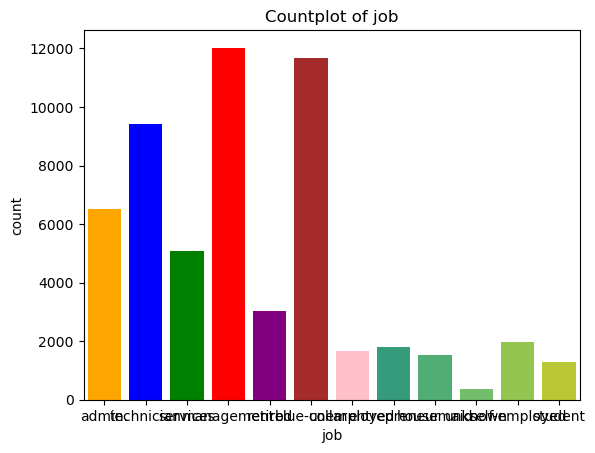

Column: marital
Number of unique values: 3
Unique values: ['married' 'single' 'divorced']
Value counts:
marital
married     33565
single      16308
divorced     6500
Name: count, dtype: int64


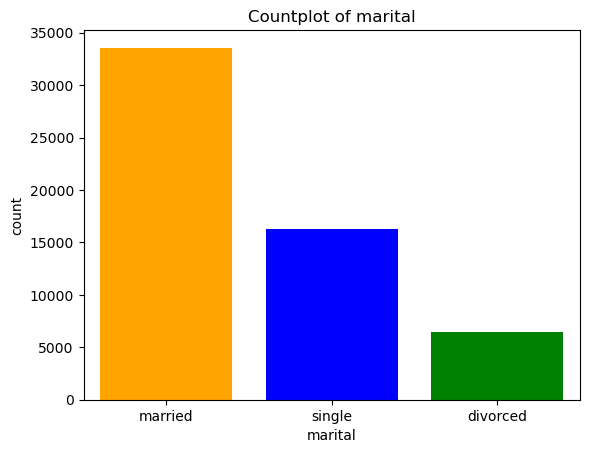

Column: education
Number of unique values: 4
Unique values: ['secondary' 'tertiary' 'primary' 'unknown']
Value counts:
education
secondary    28678
tertiary     16990
primary       8351
unknown       2354
Name: count, dtype: int64


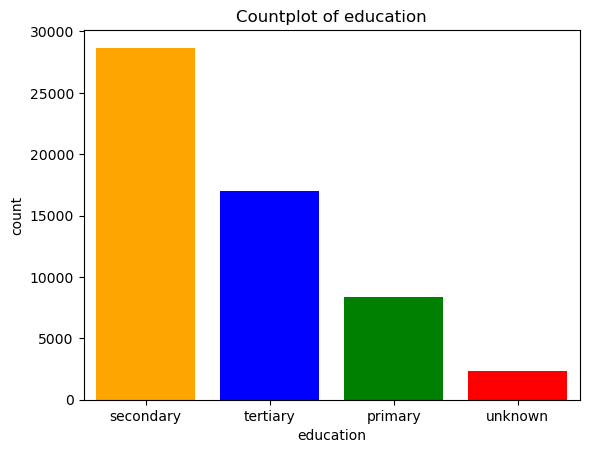

Column: default
Number of unique values: 2
Unique values: ['no' 'yes']
Value counts:
default
no     55390
yes      983
Name: count, dtype: int64


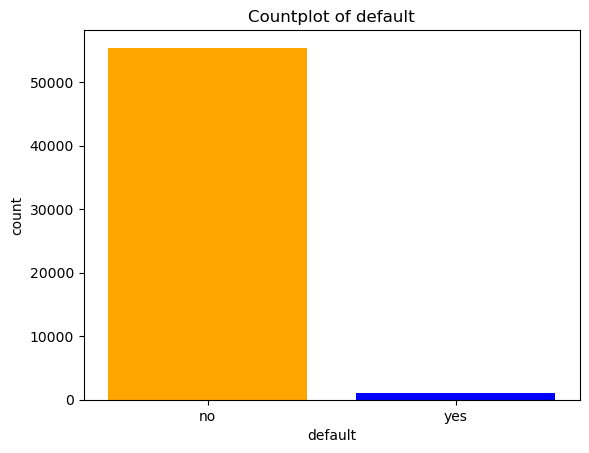

Column: housing
Number of unique values: 2
Unique values: ['yes' 'no']
Value counts:
housing
yes    30411
no     25962
Name: count, dtype: int64


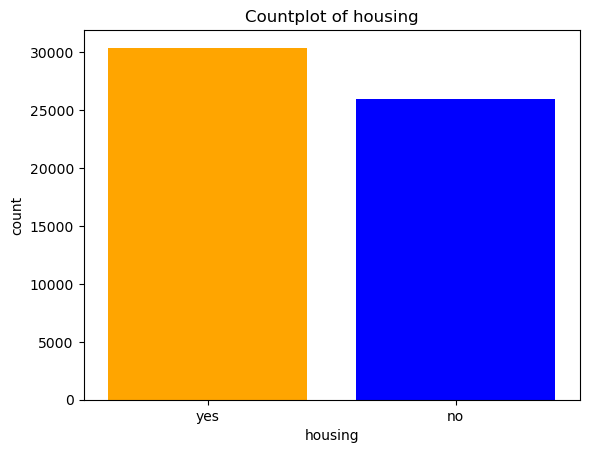

Column: loan
Number of unique values: 2
Unique values: ['no' 'yes']
Value counts:
loan
no     47669
yes     8704
Name: count, dtype: int64


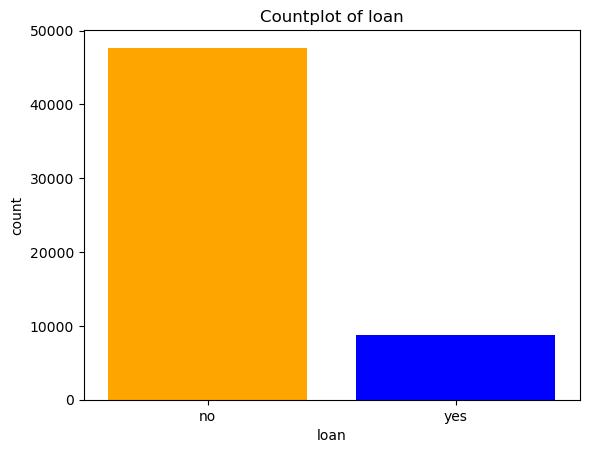

Column: contact
Number of unique values: 3
Unique values: ['unknown' 'cellular' 'telephone']
Value counts:
contact
cellular     37327
unknown      15366
telephone     3680
Name: count, dtype: int64


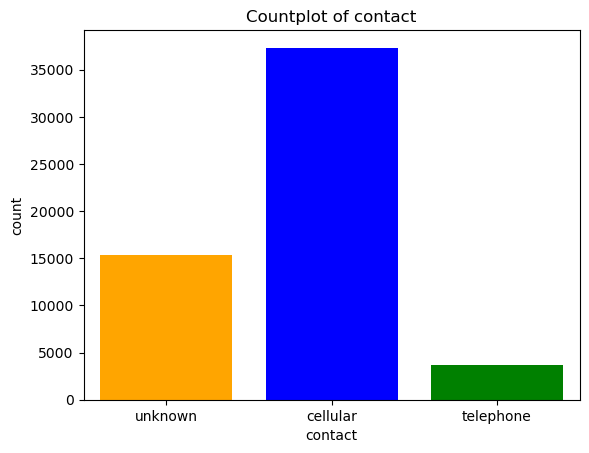

Column: month
Number of unique values: 12
Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Value counts:
month
may    16590
jul     8409
aug     7766
jun     6563
nov     4913
apr     3855
feb     3425
jan     1747
oct     1130
sep      898
mar      753
dec      324
Name: count, dtype: int64


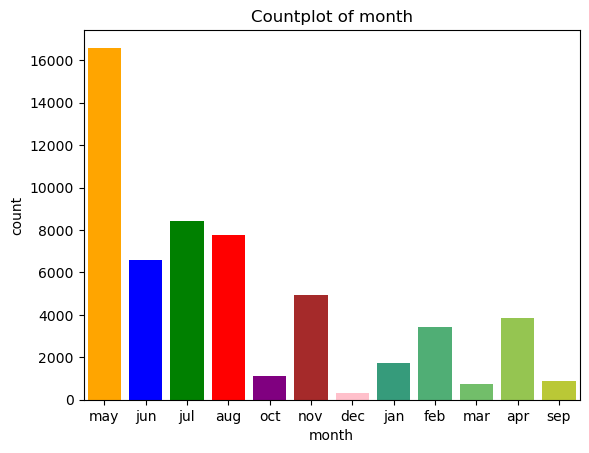

Column: poutcome
Number of unique values: 4
Unique values: ['unknown' 'other' 'failure' 'success']
Value counts:
poutcome
unknown    45285
failure     6129
success     2582
other       2377
Name: count, dtype: int64


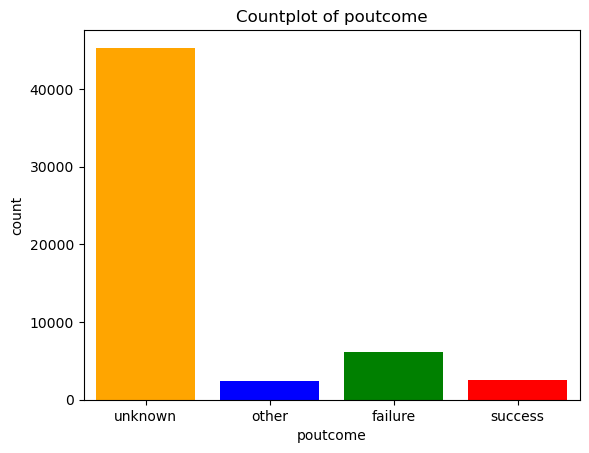

Column: deposit
Number of unique values: 2
Unique values: ['yes' 'no']
Value counts:
deposit
no     45795
yes    10578
Name: count, dtype: int64


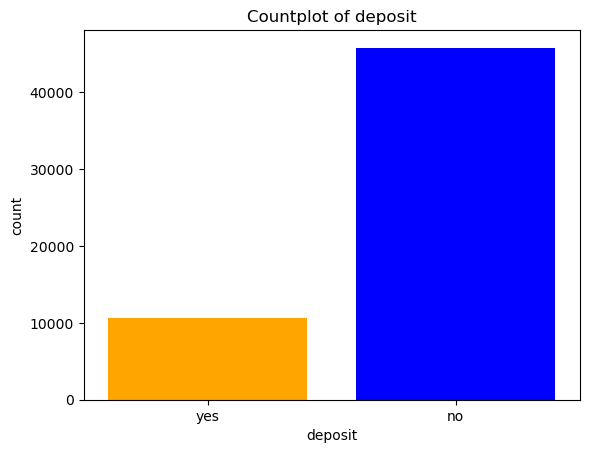

In [34]:
# Function for categorical analysis with colored bars in count plot
def categorical_analysis(df):
    for col in df.select_dtypes(include=['object', 'category']).columns:
        print(f'Column: {col}')
        print(f'Number of unique values: {df[col].nunique()}')
        print(f'Unique values: {df[col].unique()}')
        print(f'Value counts:\n{df[col].value_counts()}')

        # Create the count plot
        ax = sns.countplot(x=col, data=df, palette='viridis')
        plt.title(f'Countplot of {col}')
        
        # List of custom colors (ensure the length matches the number of unique values)
        custom_colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink']  # Add more colors if needed

        # Apply custom colors to each bar
        for patch, color in zip(ax.patches, custom_colors):
            patch.set_facecolor(color)

        # Show the plot
        plt.show()

categorical_analysis(df)

In [35]:
## Analysis by  job column
df["job"].nunique() 


12

In [36]:
df["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [37]:
# ecoding

df["job"].replace({'admin.': 1, 'technician' :2 , 'services':3, 'management':4, 'retired':5 , 'blue-collar': 6, 
                   'unemployed': 7 ,'entrepreneur':8 ,'housemaid':9,'unknown':10, 'self-employed': 11,'student':12}, inplace = True)   

In [38]:
df["job"].value_counts()

job
4     12024
6     11676
2      9420
1      6505
3      5077
5      3042
11     1984
8      1815
7      1660
9      1514
12     1298
10      358
Name: count, dtype: int64

<Axes: xlabel='job', ylabel='count'>

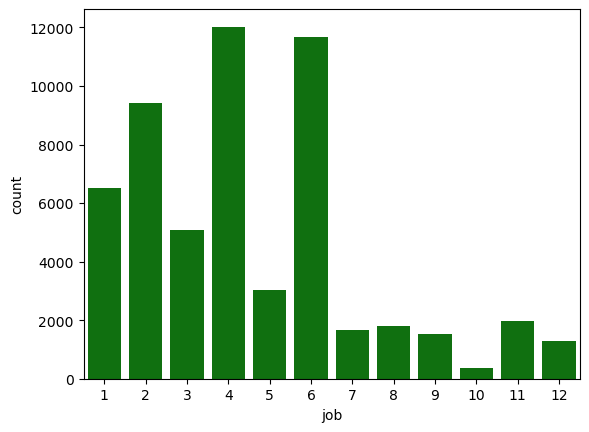

In [39]:
sns.countplot(x = df["job"], color = "green")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  int64 
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(8), object(9)
memory usage: 7.3+ MB


In [41]:
## Analysis by Marital column
df["marital"].nunique()

3

In [42]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [43]:
# ecoding

df["marital"].replace({'married': 1, 'single' :2 , 'divorced':3}, inplace = True)

In [44]:
df["marital"].value_counts()

marital
1    33565
2    16308
3     6500
Name: count, dtype: int64

<Axes: xlabel='job', ylabel='count'>

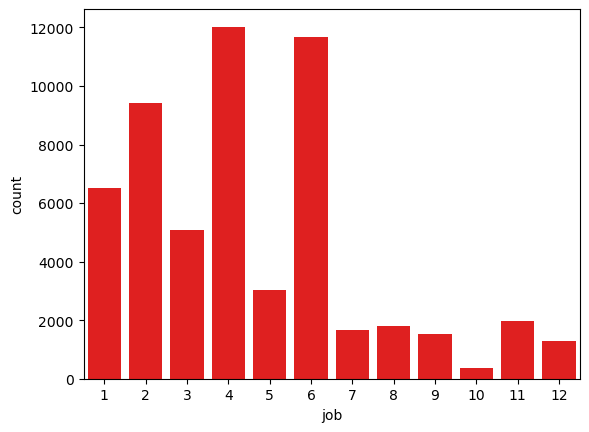

In [45]:
sns.countplot(x = df["job"],color = "Red")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  int64 
 2   marital    56373 non-null  int64 
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(9), object(8)
memory usage: 7.3+ MB


In [47]:
## Analysis by Education column
df["education"].nunique()

4

In [48]:
df["education"].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [49]:
# ecoding

df["education"].replace({'secondary': 1, 'tertiary' :2 , 'primary':3, 'unknown': 4 }, inplace = True)

In [50]:
df["education"].value_counts()


education
1    28678
2    16990
3     8351
4     2354
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

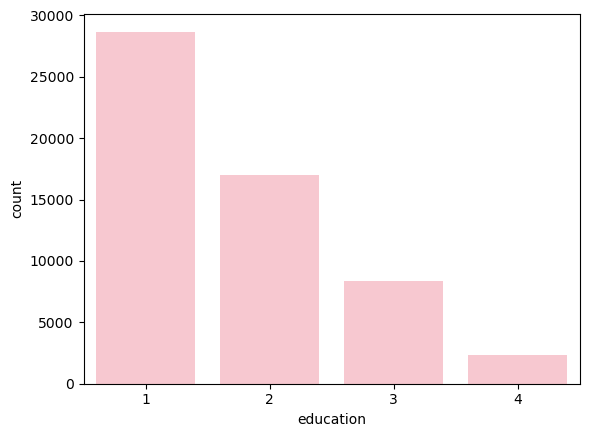

In [54]:
sns.countplot(x = df["education"], color = "Pink")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  int64 
 2   marital    56373 non-null  int64 
 3   education  56373 non-null  int64 
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(10), object(7)
memory usage: 7.3+ MB


In [58]:
## Analysis for default column

df['default'].nunique()

2

In [63]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [66]:
df['default'].replace({'no':0, 'yes': 1},inplace = True)

In [67]:
df["default"].value_counts()


default
0    55390
1      983
Name: count, dtype: int64

<Axes: xlabel='default', ylabel='count'>

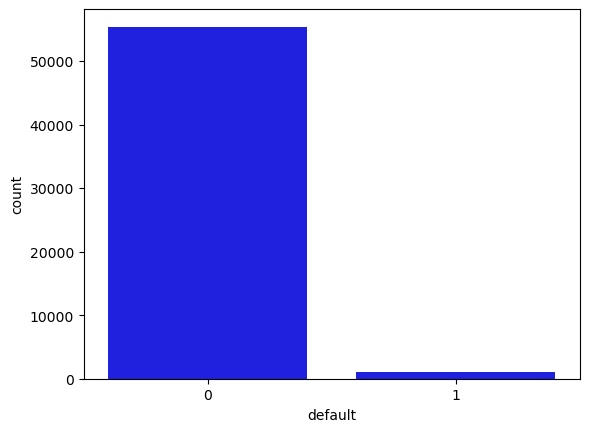

In [69]:
sns.countplot(x = df["default"], color = "Blue")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  int64 
 2   marital    56373 non-null  int64 
 3   education  56373 non-null  int64 
 4   default    56373 non-null  int64 
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(11), object(6)
memory usage: 7.3+ MB


In [76]:
df['housing'].nunique()

2

In [77]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [78]:
df['housing'].replace({'yes':1, 'no':2},inplace = True)

In [80]:
df["housing"].value_counts()

housing
1    30411
2    25962
Name: count, dtype: int64

<Axes: xlabel='housing', ylabel='count'>

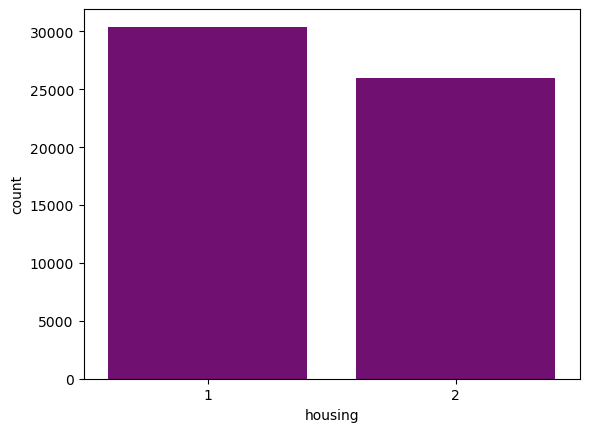

In [84]:
sns.countplot(x = df["housing"], color = "purple")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  int64 
 2   marital    56373 non-null  int64 
 3   education  56373 non-null  int64 
 4   default    56373 non-null  int64 
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  int64 
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(12), object(5)
memory usage: 7.3+ MB


In [88]:
## Analysis for default column

df['loan'].nunique()

2

In [95]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [97]:
df['loan'].replace({'no':1, 'yes':2},inplace = True)

In [101]:
df["loan"].value_counts()

loan
1    47669
2     8704
Name: count, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

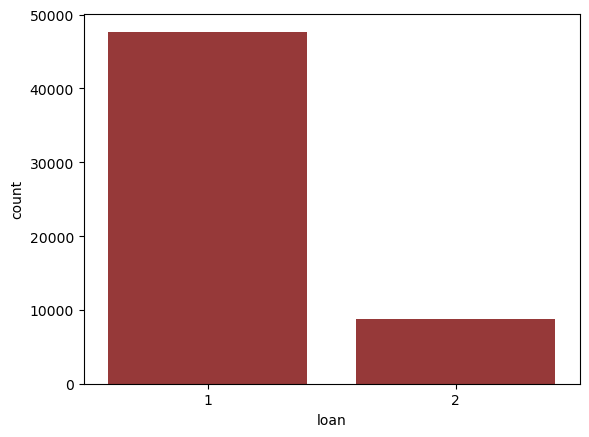

In [104]:
sns.countplot(x = df["loan"], color = "brown")

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  int64 
 2   marital    56373 non-null  int64 
 3   education  56373 non-null  int64 
 4   default    56373 non-null  int64 
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  int64 
 7   loan       56373 non-null  int64 
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(13), object(4)
memory usage: 7.3+ MB


In [108]:
## Analysis for contact column

df['contact'].nunique()

3

In [110]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [112]:
df['contact'].replace({'unknown':1, 'cellular':2, 'telephone':3 },inplace = True)

In [114]:
df["contact"].value_counts()

contact
2    37327
1    15366
3     3680
Name: count, dtype: int64

<Axes: xlabel='contact', ylabel='count'>

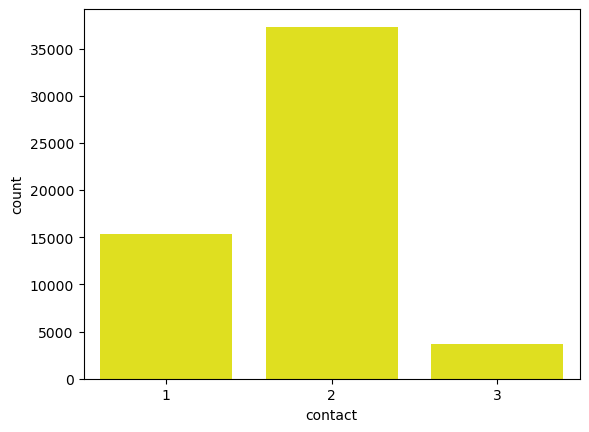

In [116]:
sns.countplot(x = df["contact"], color="yellow")

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  int64 
 2   marital    56373 non-null  int64 
 3   education  56373 non-null  int64 
 4   default    56373 non-null  int64 
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  int64 
 7   loan       56373 non-null  int64 
 8   contact    56373 non-null  int64 
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(14), object(3)
memory usage: 7.3+ MB


In [120]:
## Analysis for Month column

df['month'].nunique()

12

In [122]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [124]:
df['month'].replace({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec': 12, 'jan':1, 'feb':2 , 
                    'mar':3, 'apr':4, 'sep': 10},inplace = True)

In [126]:
df["month"].value_counts()

month
5     16590
7      8409
8      7766
6      6563
11     4913
4      3855
2      3425
10     2028
1      1747
3       753
12      324
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='count'>

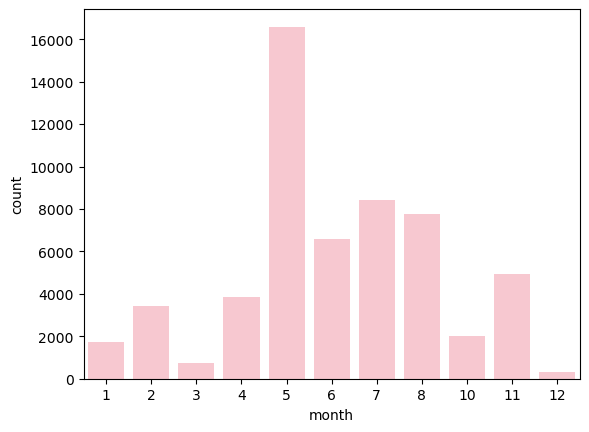

In [128]:
sns.countplot(x = df["month"],color="pink")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  int64 
 2   marital    56373 non-null  int64 
 3   education  56373 non-null  int64 
 4   default    56373 non-null  int64 
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  int64 
 7   loan       56373 non-null  int64 
 8   contact    56373 non-null  int64 
 9   day        56373 non-null  int64 
 10  month      56373 non-null  int64 
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(15), object(2)
memory usage: 7.3+ MB


In [132]:
## Analysis for POUTCOME column

df['poutcome'].nunique()

4

In [134]:
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [136]:
df['poutcome'].replace({'unknown':1, 'other':2, 'failure':3 , 'success': 4},inplace = True)

In [138]:
df["poutcome"].value_counts()

poutcome
1    45285
3     6129
4     2582
2     2377
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='count'>

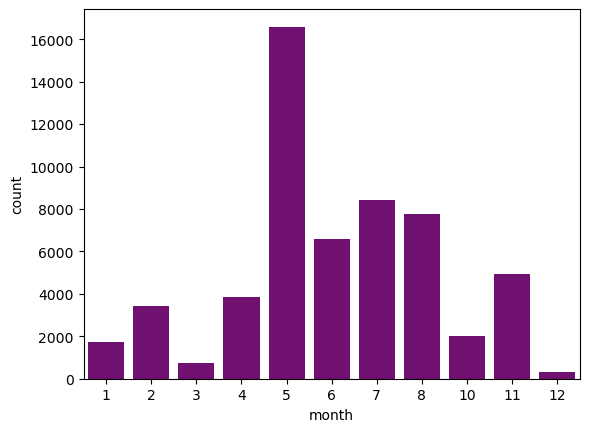

In [140]:
sns.countplot(x = df["month"], color='purple')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  int64 
 2   marital    56373 non-null  int64 
 3   education  56373 non-null  int64 
 4   default    56373 non-null  int64 
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  int64 
 7   loan       56373 non-null  int64 
 8   contact    56373 non-null  int64 
 9   day        56373 non-null  int64 
 10  month      56373 non-null  int64 
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  int64 
 16  deposit    56373 non-null  object
dtypes: int64(16), object(1)
memory usage: 7.3+ MB


In [144]:
## Analysis for POUTCOME column

df['deposit'].nunique()

2

In [146]:
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [148]:
df['deposit'].replace({'yes':1, 'no':2},inplace = True)

In [150]:
df["deposit"].value_counts()

deposit
2    45795
1    10578
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='count'>

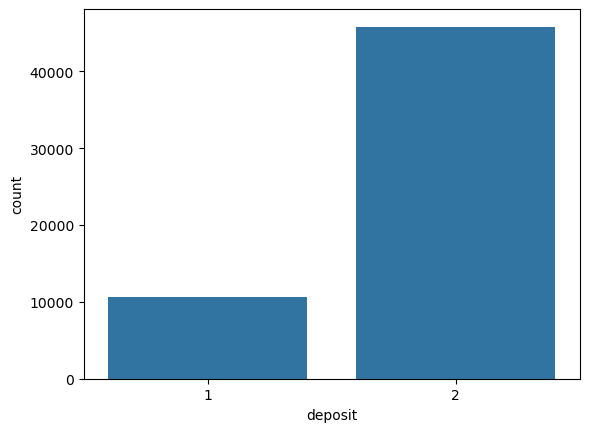

In [152]:
sns.countplot(x = df["deposit"])

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        56373 non-null  int64
 1   job        56373 non-null  int64
 2   marital    56373 non-null  int64
 3   education  56373 non-null  int64
 4   default    56373 non-null  int64
 5   balance    56373 non-null  int64
 6   housing    56373 non-null  int64
 7   loan       56373 non-null  int64
 8   contact    56373 non-null  int64
 9   day        56373 non-null  int64
 10  month      56373 non-null  int64
 11  duration   56373 non-null  int64
 12  campaign   56373 non-null  int64
 13  pdays      56373 non-null  int64
 14  previous   56373 non-null  int64
 15  poutcome   56373 non-null  int64
 16  deposit    56373 non-null  int64
dtypes: int64(17)
memory usage: 7.3 MB


In [156]:
df1 = df.drop(["deposit", "previous"], axis = 1)
vif_df = pd.DataFrame()
vif_df["Features"] = df1.columns
vif_df

Features
0         age
1         job
2     marital
3   education
4     default
5     balance
6     housing
7        loan
8     contact
9         day
10      month
11   duration
12   campaign
13      pdays
14   poutcome

## No Multicolinearity

In [159]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
vif_df["VIF"] = vif_list
vif_df

Features        VIF
0         age  13.821159
1         job   3.918872
2     marital   5.133320
3   education   5.321435
4     default   1.030602
5     balance   1.244117
6     housing  10.650433
7        loan   9.011299
8     contact  12.883746
9         day   4.544779
10      month   7.588382
11   duration   1.977655
12   campaign   1.868418
13      pdays   3.028535
14   poutcome   9.081585

In [161]:
df.drop(['pdays','previous'], axis=1, inplace=True)

In [175]:
# multivariate analysis - Pairplot and correlation matrix with heatmap

def pairplot_and_corr(df):
    """Generate pairplot and heatmap with correlation"""
    sns.pairplot(df, hue=df.columns[0]) 
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

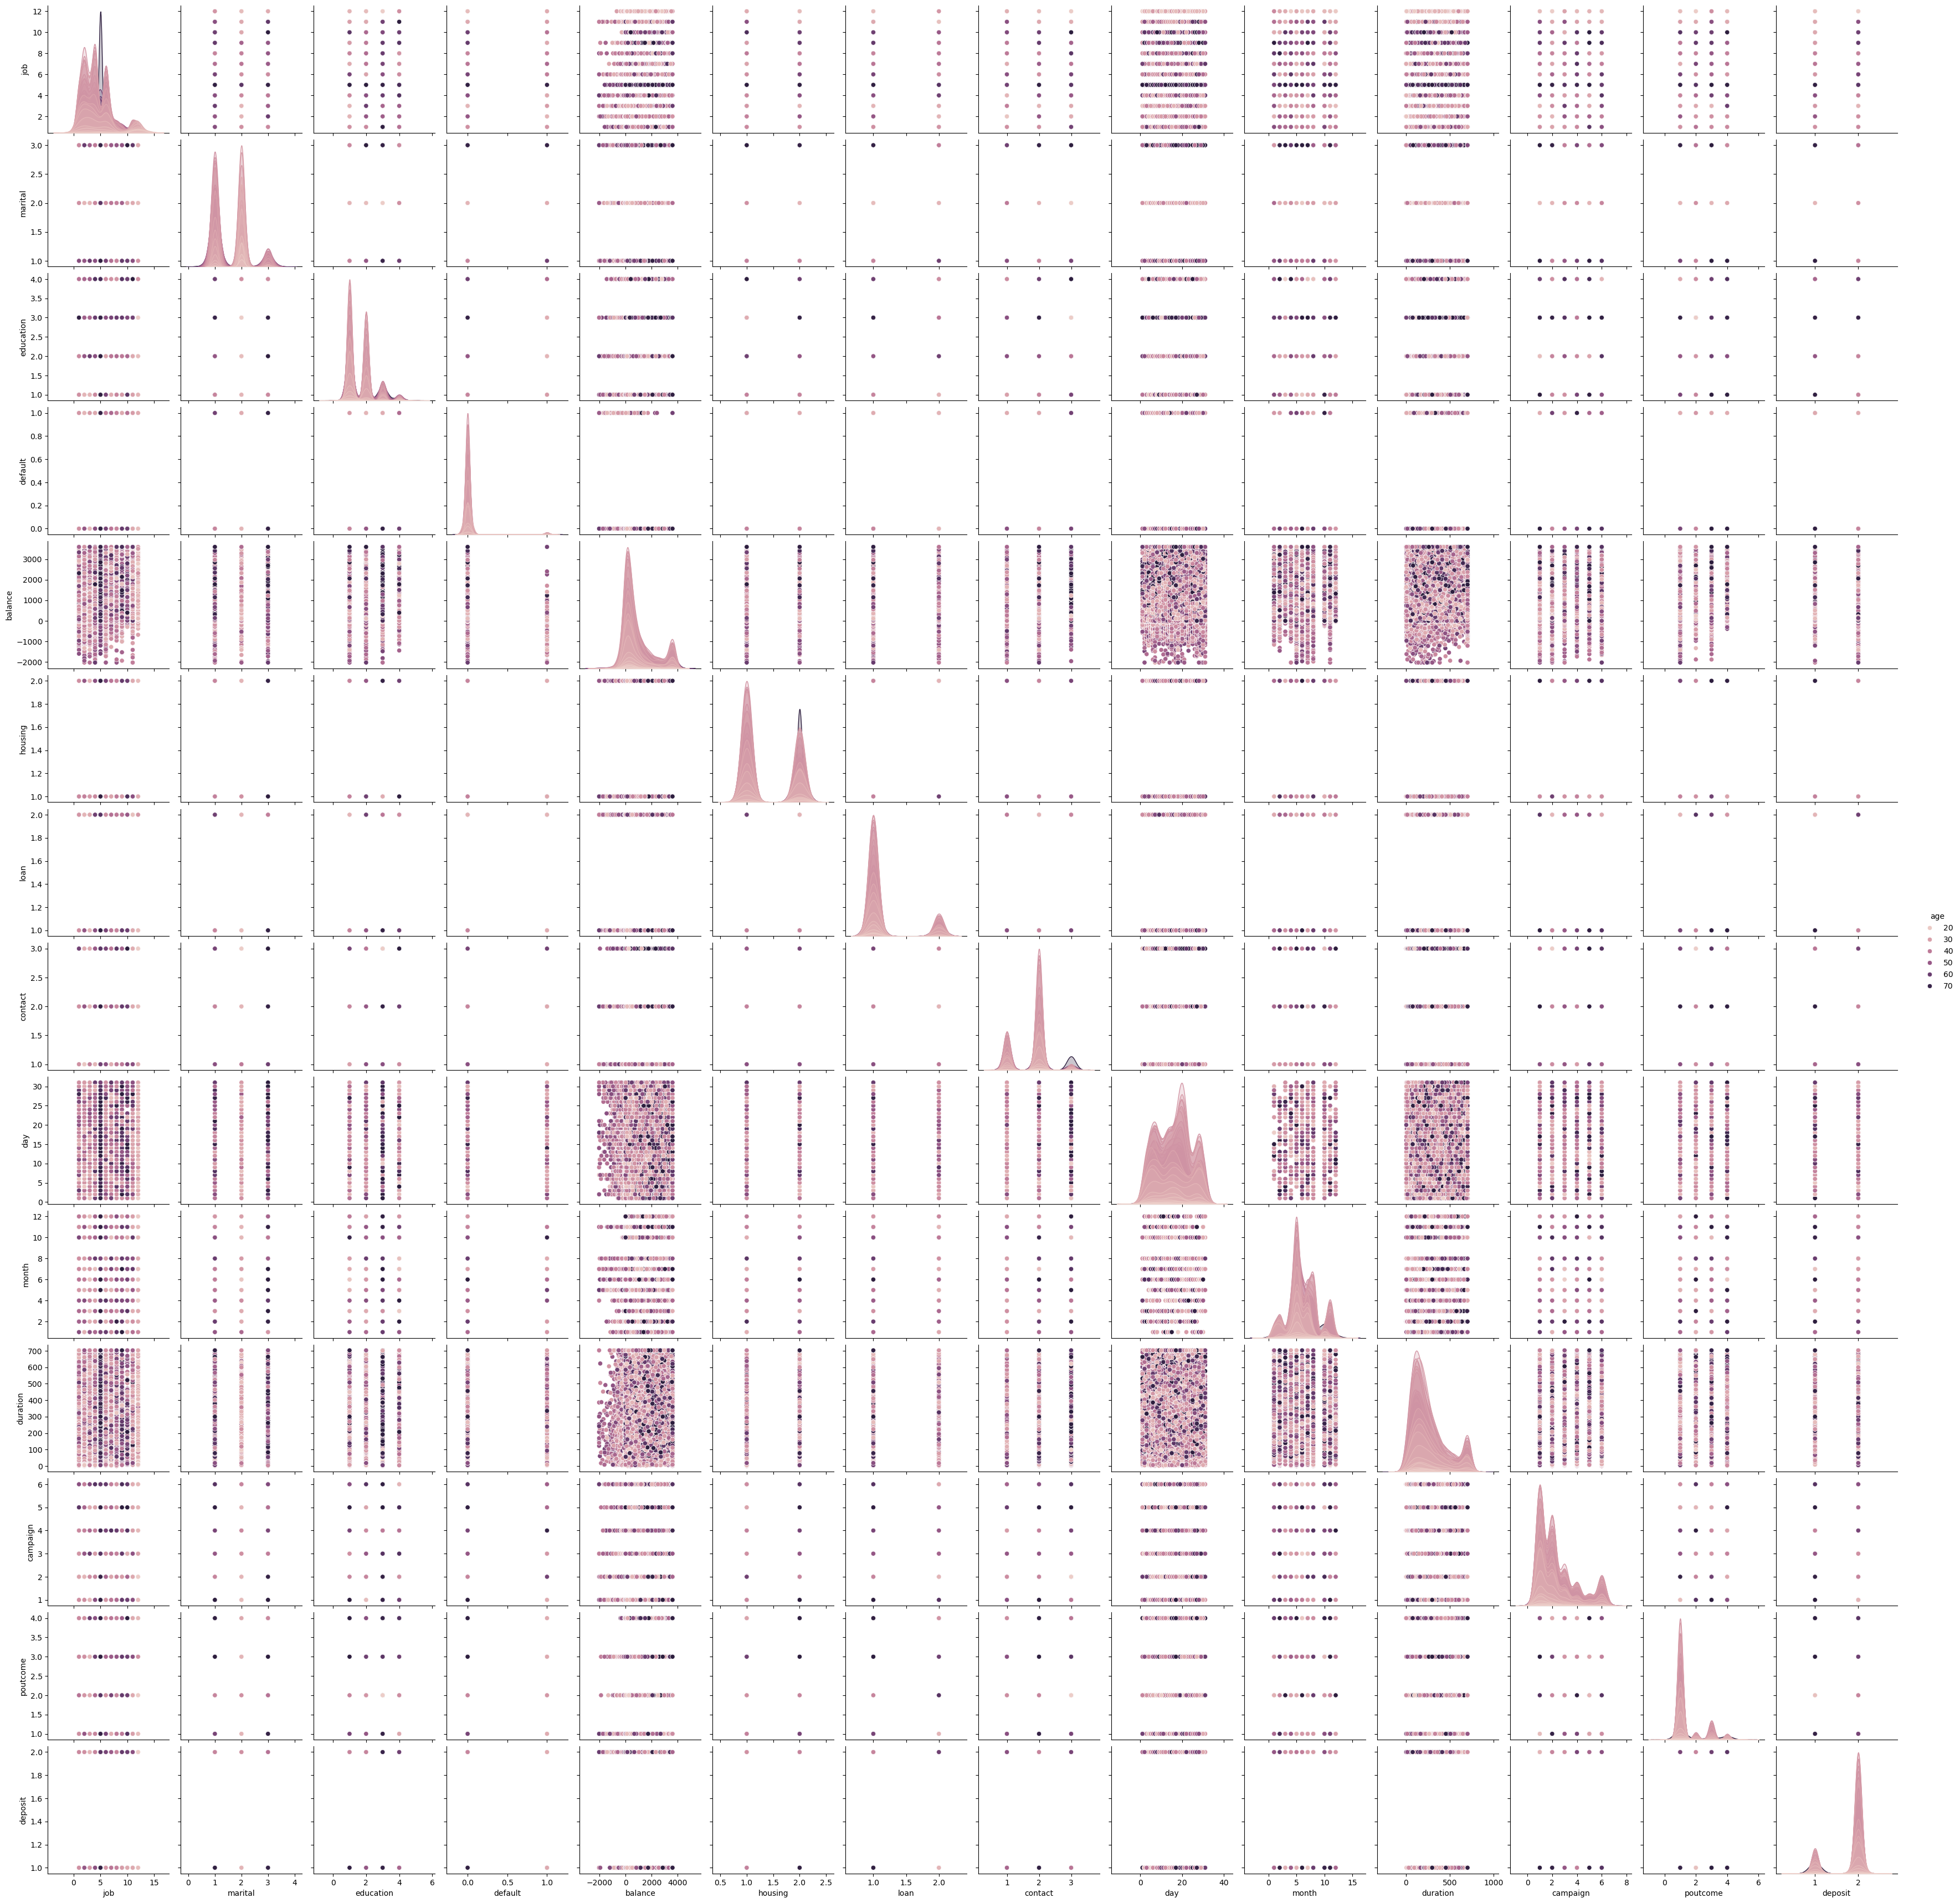

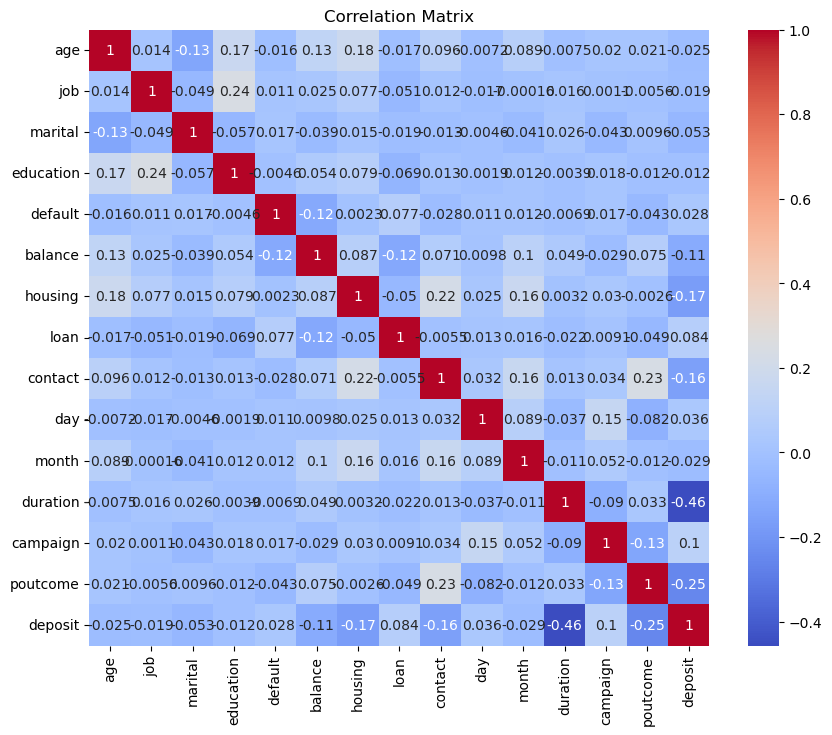

In [177]:
pairplot_and_corr(df)

In [189]:
    df.corr()

age       job   marital  education   default   balance  \
age        1.000000  0.013696 -0.132251   0.168771 -0.016209  0.125694   
job        0.013696  1.000000 -0.049063   0.238579  0.010640  0.025186   
marital   -0.132251 -0.049063  1.000000  -0.056944  0.017394 -0.038659   
education  0.168771  0.238579 -0.056944   1.000000 -0.004648  0.053559   
default   -0.016209  0.010640  0.017394  -0.004648  1.000000 -0.120014   
balance    0.125694  0.025186 -0.038659   0.053559 -0.120014  1.000000   
housing    0.179651  0.077163  0.015074   0.078608  0.002254  0.087250   
loan      -0.017222 -0.050863 -0.019281  -0.068749  0.077347 -0.122368   
contact    0.095613  0.011862 -0.013459   0.013122 -0.028257  0.071049   
day       -0.007195 -0.017461 -0.004589  -0.001903  0.010952  0.009797   
month      0.089069 -0.000159 -0.040855   0.012105  0.012388  0.104447   
duration  -0.007516  0.015826  0.025992  -0.003942 -0.006907  0.048816   
campaign   0.020211  0.001148 -0.042705   0.018272  0.017376 -0.029231   
poutcome   0.020780 -0.005551  0.009644  -0.011661 -0.042979  0.074714   
deposit   -0.025198 -0.018819 -0.053276  -0.011606  0.027926 -0.111497   

            housing      loan   contact       day     month  duration  \
age        0.179651 -0.017222  0.095613 -0.007195  0.089069 -0.007516   
job        0.077163 -0.050863  0.011862 -0.017461 -0.000159  0.015826   
marital    0.015074 -0.019281 -0.013459 -0.004589 -0.040855  0.025992   
education  0.078608 -0.068749  0.013122 -0.001903  0.012105 -0.003942   
default    0.002254  0.077347 -0.028257  0.010952  0.012388 -0.006907   
balance    0.087250 -0.122368  0.071049  0.009797  0.104447  0.048816   
housing    1.000000 -0.049891  0.218297  0.024806  0.164961  0.003177   
loan      -0.049891  1.000000 -0.005486  0.012686  0.016098 -0.021839   
contact    0.218297 -0.005486  1.000000  0.031732  0.161174  0.013217   
day        0.024806  0.012686  0.031732  1.000000  0.089370 -0.036881   
month      0.164961  0.016098  0.161174  0.089370  1.000000 -0.011010   
duration   0.003177 -0.021839  0.013217 -0.036881 -0.011010  1.000000   
campaign   0.030021  0.009127  0.033863  0.148681  0.051948 -0.089662   
poutcome  -0.002552 -0.048994  0.234355 -0.081511 -0.012053  0.032616   
deposit   -0.167396  0.083650 -0.160041  0.035650 -0.029192 -0.456409   

           campaign  poutcome   deposit  
age        0.020211  0.020780 -0.025198  
job        0.001148 -0.005551 -0.018819  
marital   -0.042705  0.009644 -0.053276  
education  0.018272 -0.011661 -0.011606  
default    0.017376 -0.042979  0.027926  
balance   -0.029231  0.074714 -0.111497  
housing    0.030021 -0.002552 -0.167396  
loan       0.009127 -0.048994  0.083650  
contact    0.033863  0.234355 -0.160041  
day        0.148681 -0.081511  0.035650  
month      0.051948 -0.012053 -0.029192  
duration  -0.089662  0.032616 -0.456409  
campaign   1.000000 -0.133007  0.102767  
poutcome  -0.133007  1.000000 -0.252540  
deposit    0.102767 -0.252540  1.000000

<Axes: >

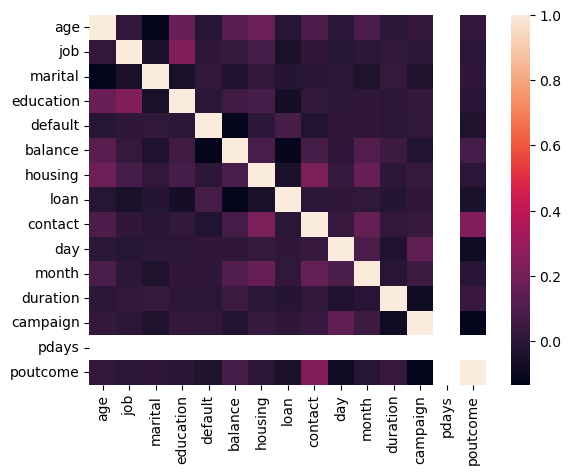

In [191]:
sns.heatmap(df1.corr())

In [163]:
# Train-test split

X = df1
y = df['deposit']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {xtrain.shape}')
print(f'Shape of X_test: {xtest.shape}')
print(f'Shape of y_train: {ytrain.shape}')
print(f'Shape of y_test: {ytest.shape}')

Shape of X_train: (45098, 15)
Shape of X_test: (11275, 15)
Shape of y_train: (45098,)
Shape of y_test: (11275,)


## Model Training

In [166]:
logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [168]:
logistic_reg_model=logistic_reg.fit(xtrain,ytrain)

In [170]:
ytrain_predict = logistic_reg_model.predict(xtrain)

## Evaluate model for training data

In [173]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy Score = {accuracy}")
print("*"*60)

con_mat = multilabel_confusion_matrix(ytrain,ytrain_predict)
print(f"Confusion Matrix : \n{con_mat}")
print("*"*60)

clss_report = classification_report(ytrain,ytrain_predict)
print(f"Classification report : \n{clss_report}")
print("*"*60)


Accuracy Score = 0.837354206394962
************************************************************
Confusion Matrix : 
[[[35267  1353]
  [ 5982  2496]]

 [[ 2496  5982]
  [ 1353 35267]]]
************************************************************
Classification report : 
              precision    recall  f1-score   support

           1       0.65      0.29      0.40      8478
           2       0.85      0.96      0.91     36620

    accuracy                           0.84     45098
   macro avg       0.75      0.63      0.66     45098
weighted avg       0.82      0.84      0.81     45098

************************************************************


## Evalution on testing data

In [176]:
ytest_pred = logistic_reg_model.predict(xtest)

In [178]:
accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy Score = {accuracy}")
print("*"*60)

con_mat = multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{con_mat}")
print("*"*60)

clss_report = classification_report(ytest,ytest_pred)
print(f"Classification report : \n{clss_report}")
print("*"*60)


Accuracy Score = 0.8372505543237251
************************************************************
Confusion Matrix : 
[[[8842  333]
  [1502  598]]

 [[ 598 1502]
  [ 333 8842]]]
************************************************************
Classification report : 
              precision    recall  f1-score   support

           1       0.64      0.28      0.39      2100
           2       0.85      0.96      0.91      9175

    accuracy                           0.84     11275
   macro avg       0.75      0.62      0.65     11275
weighted avg       0.82      0.84      0.81     11275

************************************************************


## Algorithm 2 decision Tree 

In [181]:
dt_clf = DecisionTreeClassifier(ccp_alpha=0.0)
dt_clf_model = dt_clf.fit(xtrain,ytrain) 
dt_clf_model

DecisionTreeClassifier()

## Evaluate Model for training data

Accuracy = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8478
           2       1.00      1.00      1.00     36620

    accuracy                           1.00     45098
   macro avg       1.00      1.00      1.00     45098
weighted avg       1.00      1.00      1.00     45098

Axes(0.125,0.11;0.62x0.77)


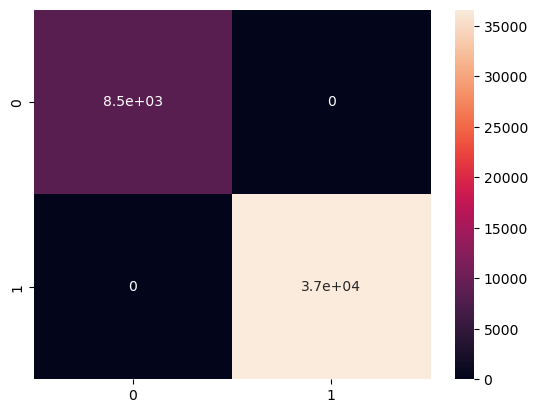

In [184]:
#training

ytrain_pred = dt_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))


## Evaluate model for Testing Data

Accuracy = 0.9331263858093126
              precision    recall  f1-score   support

           1       0.77      0.91      0.84      2100
           2       0.98      0.94      0.96      9175

    accuracy                           0.93     11275
   macro avg       0.88      0.92      0.90     11275
weighted avg       0.94      0.93      0.94     11275

Axes(0.125,0.11;0.62x0.77)


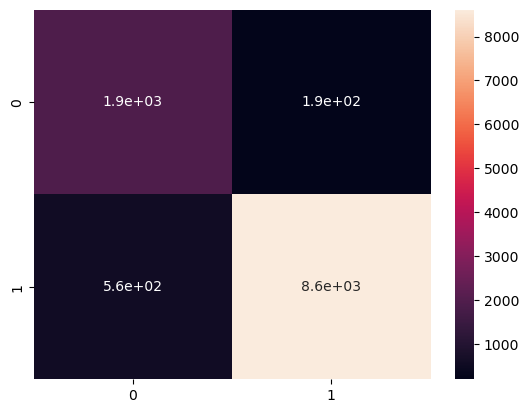

In [187]:
# Testing 
ytest_pred = dt_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

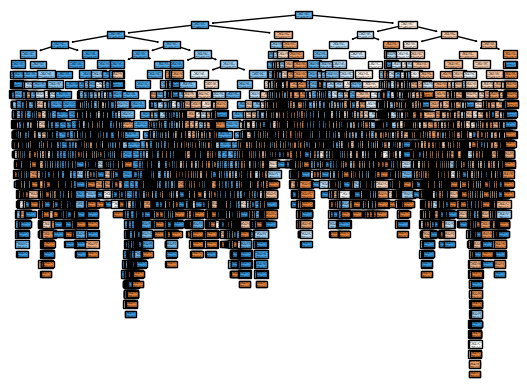

In [219]:
plot_tree(dt_clf_model, feature_names=X.columns,class_names=["Yes", "no"], filled=True)
plt.show()

## Decision tree with hyperparameter tunning

In [225]:
hyperparameters = {"criterion" : ["gini","entropy","log_loss"],  
                  "max_depth" : np.arange(2,11),
                  "min_samples_split" : np.arange(2,11),
                  "min_samples_leaf" : np.arange(2, 12) }

In [226]:
rscv_dt = RandomizedSearchCV(dt_clf_model, hyperparameters, cv=5)
rscv_dt = rscv_dt.fit(xtrain,ytrain)
rscv_dt

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [227]:
rscv_dt.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=11, min_samples_split=8)

In [228]:
rscv_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=13)
rscv_dt

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=13)

In [229]:
rscv_dt_clf_model = rscv_dt.fit(xtrain,ytrain)
rscv_dt_clf_model

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=13)

Accuracy = 0.8800390261208922
              precision    recall  f1-score   support

           1       0.70      0.63      0.67      8478
           2       0.92      0.94      0.93     36620

    accuracy                           0.88     45098
   macro avg       0.81      0.79      0.80     45098
weighted avg       0.88      0.88      0.88     45098

Axes(0.125,0.11;0.62x0.77)


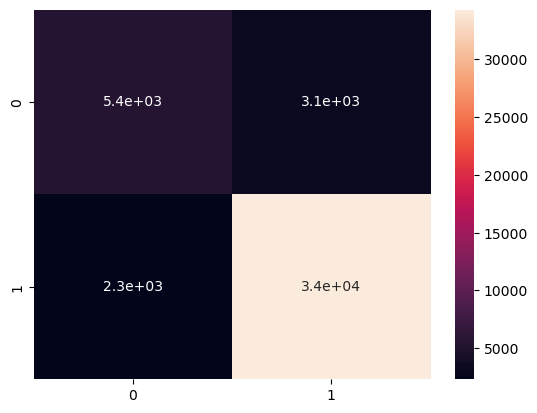

In [235]:
#training

ytrain_pred = rscv_dt_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.8726385809312639
              precision    recall  f1-score   support

           1       0.67      0.62      0.64      2100
           2       0.91      0.93      0.92      9175

    accuracy                           0.87     11275
   macro avg       0.79      0.77      0.78     11275
weighted avg       0.87      0.87      0.87     11275

Axes(0.125,0.11;0.62x0.77)


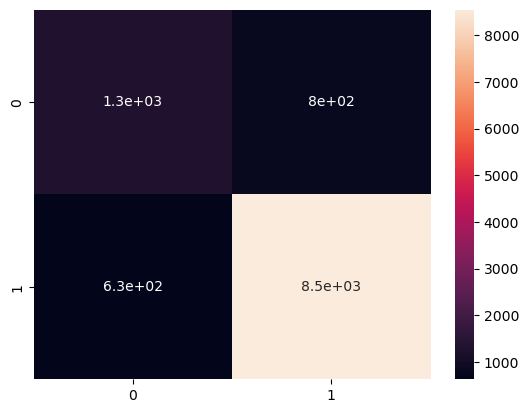

In [237]:
## Testing
ytest_pred = rscv_dt_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))


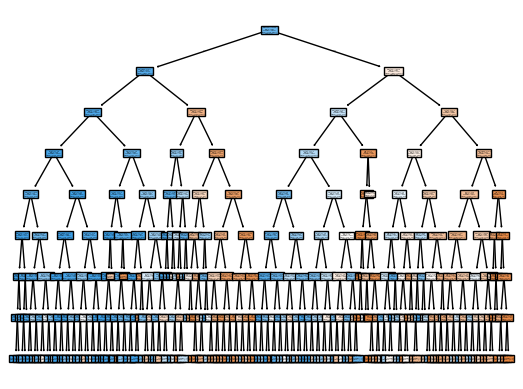

In [239]:
plot_tree(rscv_dt_clf_model, feature_names=X.columns, class_names=["Yes", "No"], filled=True)
plt.show()

## Best features by feature importance

In [241]:
feature_imporatance_df = pd.DataFrame(rscv_dt_clf_model.feature_importances_)
feature_imporatance_df

0
0   0.016041
1   0.003610
2   0.005877
3   0.002100
4   0.000305
5   0.013070
6   0.058046
7   0.003634
8   0.039982
9   0.025954
10  0.100527
11  0.480017
12  0.004412
13  0.000000
14  0.246425

In [243]:
feature_imporatance_df["Features"] = X.columns

In [245]:
feature_imporatance_df.rename({0:"Value"}, axis = 1, inplace=True)
feature_imporatance_df

Value   Features
0   0.016041        age
1   0.003610        job
2   0.005877    marital
3   0.002100  education
4   0.000305    default
5   0.013070    balance
6   0.058046    housing
7   0.003634       loan
8   0.039982    contact
9   0.025954        day
10  0.100527      month
11  0.480017   duration
12  0.004412   campaign
13  0.000000      pdays
14  0.246425   poutcome

<Axes: xlabel='Features', ylabel='Value'>

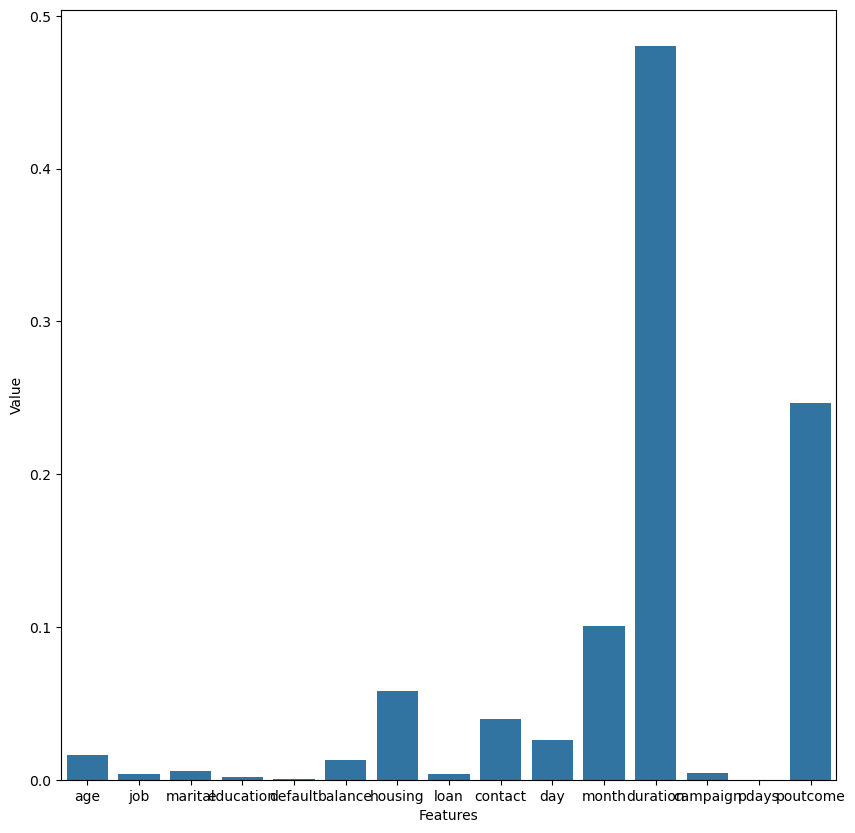

In [247]:
plt.figure(figsize=(10,10))
sns.barplot(x= feature_imporatance_df["Features"], y =feature_imporatance_df["Value"])

## Algorithm 3 - : Random Forest

In [250]:
rf_clf = RandomForestClassifier()
rf_clf

RandomForestClassifier()

In [252]:
rf_clf_model = rf_clf.fit(xtrain,ytrain)
rf_clf_model

RandomForestClassifier()

## Evalution model for Traning Data 

Accuracy = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8478
           2       1.00      1.00      1.00     36620

    accuracy                           1.00     45098
   macro avg       1.00      1.00      1.00     45098
weighted avg       1.00      1.00      1.00     45098

Axes(0.125,0.11;0.62x0.77)


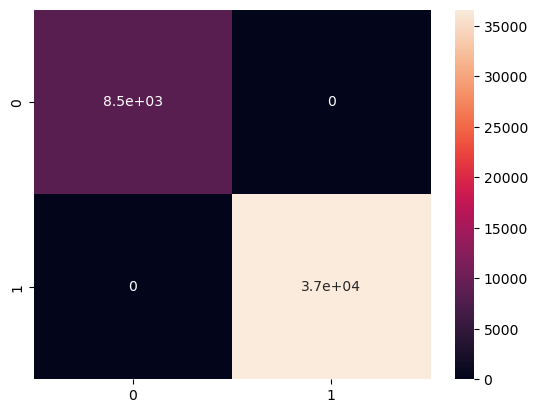

In [254]:
#training

ytrain_pred = rf_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

## Evalution Model for Testing data 

Accuracy = 0.9536141906873614
              precision    recall  f1-score   support

           1       0.85      0.92      0.88      2100
           2       0.98      0.96      0.97      9175

    accuracy                           0.95     11275
   macro avg       0.91      0.94      0.93     11275
weighted avg       0.96      0.95      0.95     11275

Axes(0.125,0.11;0.62x0.77)


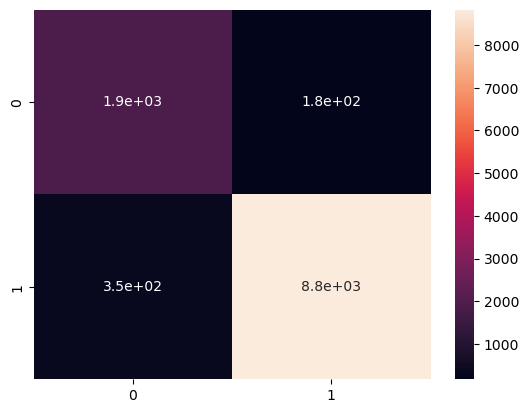

In [256]:
## Testing
ytest_pred = rf_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

## Randomforest with hyperparameter tunning

In [258]:
hyp = {"criterion" : ["gini","entropy","log_loss"], 
       "max_depth" : np.arange(2,11),
       "min_samples_split" : np.arange(2,11),
       "min_samples_leaf" : np.arange(2, 12),
       "n_estimators" : np.arange(10, 101)
}

In [263]:
rscv_rf = RandomizedSearchCV(rf_clf_model, hyp, cv = 5)
rscv_rf = rscv_rf.fit(xtrain, ytrain)
rscv_rf.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=11,
                       min_samples_split=7, n_estimators=81)

In [264]:
rscv_rf_clf = RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=9, n_estimators=37)

rscv_rf_clf_model = rscv_rf_clf.fit(xtrain,ytrain)
rscv_rf_clf_model

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=9, n_estimators=37)

Accuracy = 0.8464011707836268
              precision    recall  f1-score   support

           1       0.82      0.23      0.37      8478
           2       0.85      0.99      0.91     36620

    accuracy                           0.85     45098
   macro avg       0.83      0.61      0.64     45098
weighted avg       0.84      0.85      0.81     45098

Axes(0.125,0.11;0.62x0.77)


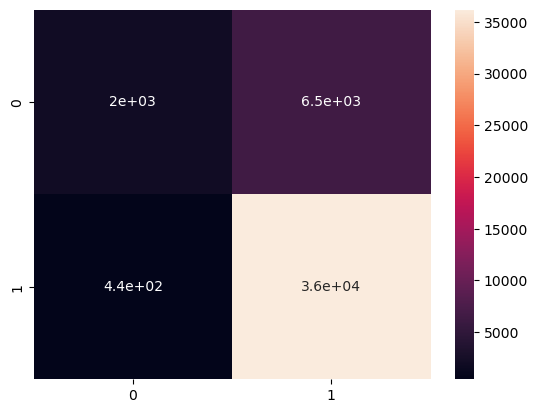

In [265]:
## Traning 

ytrain_pred = rscv_rf_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.8473614190687362
              precision    recall  f1-score   support

           1       0.81      0.24      0.37      2100
           2       0.85      0.99      0.91      9175

    accuracy                           0.85     11275
   macro avg       0.83      0.61      0.64     11275
weighted avg       0.84      0.85      0.81     11275

Axes(0.125,0.11;0.62x0.77)


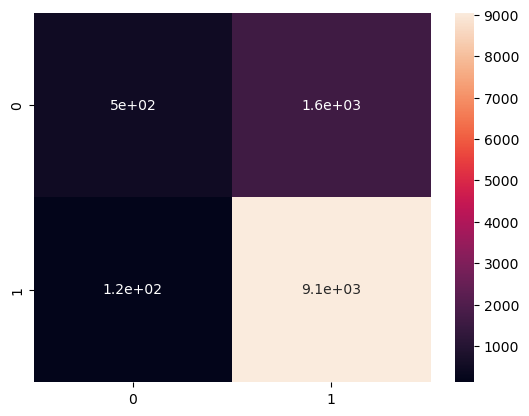

In [266]:
## Testing 

ytest_pred = rscv_rf_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

## Algorithm 4 - : ADABoost

In [268]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [269]:
adb_clf = AdaBoostClassifier(random_state=20)
adb_clf

AdaBoostClassifier(random_state=20)

In [270]:
adb_clf_model = adb_clf.fit(xtrain,ytrain)
adb_clf_model

AdaBoostClassifier(random_state=20)

## Evalution model for Traning Data

Accuracy = 0.8645616213579316
              precision    recall  f1-score   support

           1       0.69      0.50      0.58      8478
           2       0.89      0.95      0.92     36620

    accuracy                           0.86     45098
   macro avg       0.79      0.72      0.75     45098
weighted avg       0.85      0.86      0.86     45098

Axes(0.125,0.11;0.62x0.77)


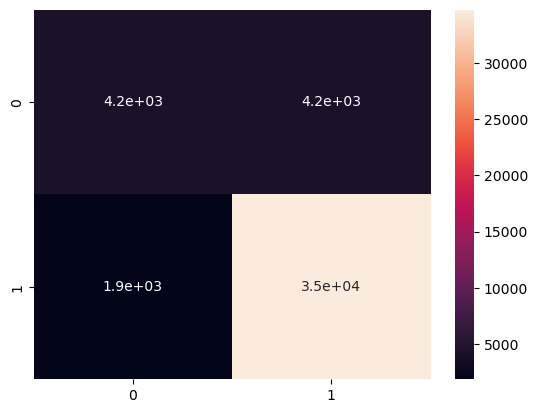

In [272]:
#training

ytrain_pred = adb_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

## Evalution Model for Testing data

Accuracy = 0.8635920177383593
              precision    recall  f1-score   support

           1       0.69      0.49      0.57      2100
           2       0.89      0.95      0.92      9175

    accuracy                           0.86     11275
   macro avg       0.79      0.72      0.75     11275
weighted avg       0.85      0.86      0.85     11275

Axes(0.125,0.11;0.62x0.77)


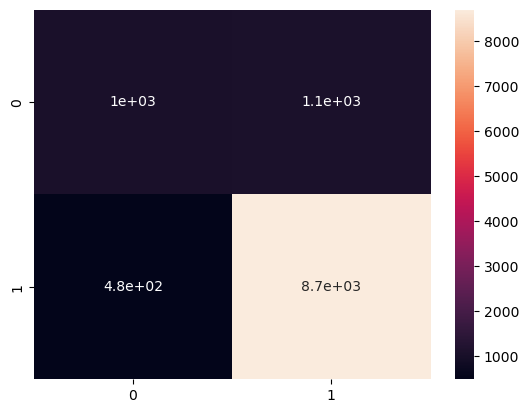

In [274]:
## Testing
ytest_pred = adb_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

## Adaboost with hyperparameter tunning

In [284]:
hyp = {"n_estimators":np.arange(10,100),
       "learning_rate": np.arange(0.01,1,0.01)
}

In [286]:
rscv_adb = RandomizedSearchCV(adb_clf_model, hyp, cv = 7)
rscv_adb = rscv_adb.fit(xtrain, ytrain)
rscv_adb.best_estimator_

AdaBoostClassifier(learning_rate=0.44, n_estimators=80, random_state=20)

In [287]:
rscv_adb_clf_model = rscv_adb.fit(xtrain,ytrain)
rscv_adb_clf_model

RandomizedSearchCV(cv=7, estimator=AdaBoostClassifier(random_state=20),
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48,...
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

Accuracy = 0.8642511863053794
              precision    recall  f1-score   support

           1       0.69      0.50      0.58      8478
           2       0.89      0.95      0.92     36620

    accuracy                           0.86     45098
   macro avg       0.79      0.72      0.75     45098
weighted avg       0.85      0.86      0.86     45098

Axes(0.125,0.11;0.62x0.77)


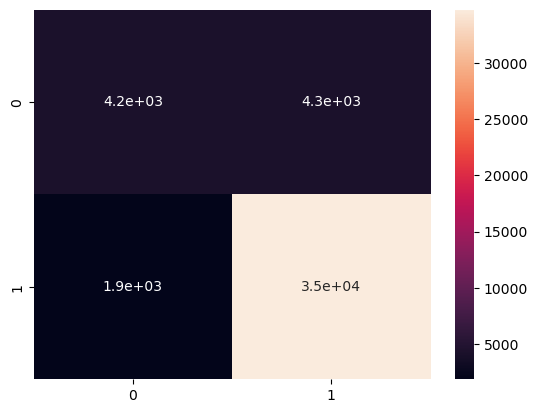

In [288]:
## Traning 

ytrain_pred = rscv_adb_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.8645676274944568
              precision    recall  f1-score   support

           1       0.69      0.50      0.58      2100
           2       0.89      0.95      0.92      9175

    accuracy                           0.86     11275
   macro avg       0.79      0.72      0.75     11275
weighted avg       0.85      0.86      0.86     11275

Axes(0.125,0.11;0.62x0.77)


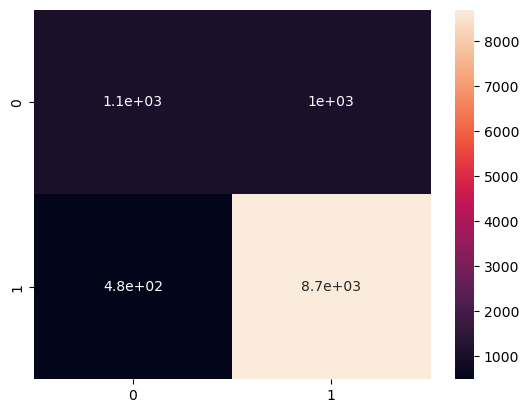

In [289]:
## Testing 

ytest_pred = rscv_adb_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

## Algorithm 5 - : Gradient Boosting

In [294]:
gdb_clf = GradientBoostingClassifier()
gdb_clf

GradientBoostingClassifier()

In [296]:
gdb_clf_model = gdb_clf.fit(xtrain,ytrain)
gdb_clf_model

GradientBoostingClassifier()

## Evalution model for Traning Data

Accuracy = 0.8803938090380948
              precision    recall  f1-score   support

           1       0.72      0.59      0.65      8478
           2       0.91      0.95      0.93     36620

    accuracy                           0.88     45098
   macro avg       0.82      0.77      0.79     45098
weighted avg       0.87      0.88      0.88     45098

Axes(0.125,0.11;0.62x0.77)


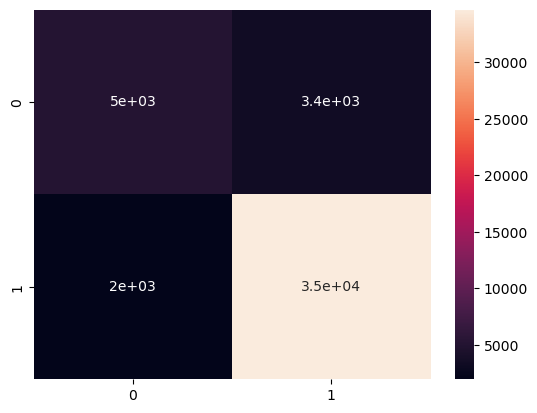

In [298]:
# Training

ytrain_pred = gdb_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

## Evalution Model for Testing data

Accuracy = 0.8790243902439024
              precision    recall  f1-score   support

           1       0.71      0.59      0.64      2100
           2       0.91      0.95      0.93      9175

    accuracy                           0.88     11275
   macro avg       0.81      0.77      0.79     11275
weighted avg       0.87      0.88      0.87     11275

Axes(0.125,0.11;0.62x0.77)


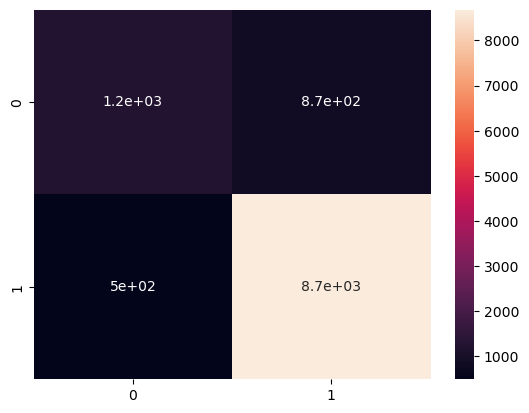

In [300]:
## Testing
ytest_pred = gdb_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

## Gradient Boosting with hyperparameter tunning

In [304]:
hyp = {"n_estimators":np.arange(10,100),
       "learning_rate": np.arange(0.01,1,0.01)
}

In [306]:
rscv_gdb = RandomizedSearchCV(gdb_clf_model, hyp, cv = 5)
rscv_gdb = rscv_gdb.fit(xtrain, ytrain)
rscv_gdb.best_estimator_

GradientBoostingClassifier(learning_rate=0.46, n_estimators=64)

In [307]:
rscv_gdb_clf_model = rscv_gdb.fit(xtrain,ytrain)
rscv_gdb_clf_model

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0....
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

Accuracy = 0.9000842609428356
              precision    recall  f1-score   support

           1       0.76      0.69      0.72      8478
           2       0.93      0.95      0.94     36620

    accuracy                           0.90     45098
   macro avg       0.84      0.82      0.83     45098
weighted avg       0.90      0.90      0.90     45098

Axes(0.125,0.11;0.62x0.77)


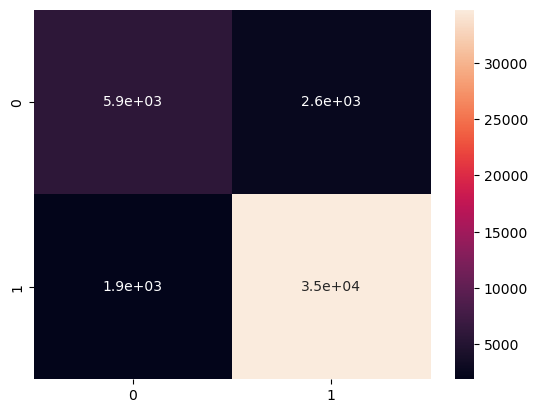

In [308]:
## Traning 

ytrain_pred = rscv_gdb_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.8901108647450111
              precision    recall  f1-score   support

           1       0.72      0.66      0.69      2100
           2       0.92      0.94      0.93      9175

    accuracy                           0.89     11275
   macro avg       0.82      0.80      0.81     11275
weighted avg       0.89      0.89      0.89     11275

Axes(0.125,0.11;0.62x0.77)


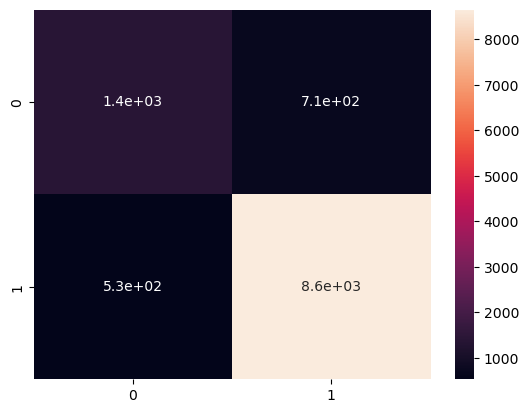

In [309]:
## Testing

ytest_pred = rscv_gdb_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

## Algorithm 6 : XGBBoost

In [318]:
xgb_clf = XGBClassifier()
xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [471]:
print(ytrain.unique())


[2 1]


In [473]:
ytrain = ytrain.map({1: 0, 2: 1})
ytest = ytest.map({1: 0, 2: 1})


In [475]:
print(ytrain.unique())  # Should output: [0, 1]


[1 0]


In [477]:
xgb_clf_model = xgb_clf.fit(xtrain,ytrain)
xgb_clf_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Evalution model for Traning Data


Accuracy = 0.9461395183821899
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      8478
           1       0.96      0.97      0.97     36620

    accuracy                           0.95     45098
   macro avg       0.91      0.91      0.91     45098
weighted avg       0.95      0.95      0.95     45098

Axes(0.125,0.11;0.62x0.77)


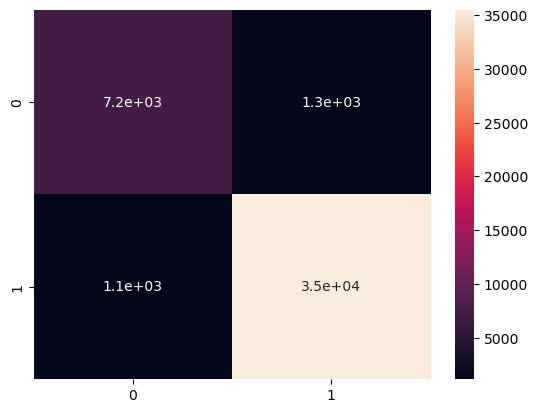

In [329]:
##Training

ytrain_pred = xgb_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

## Evalution Model for Testing data

Accuracy = 0.9118403547671841
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2100
           1       0.94      0.95      0.95      9175

    accuracy                           0.91     11275
   macro avg       0.86      0.85      0.85     11275
weighted avg       0.91      0.91      0.91     11275

Axes(0.125,0.11;0.62x0.77)


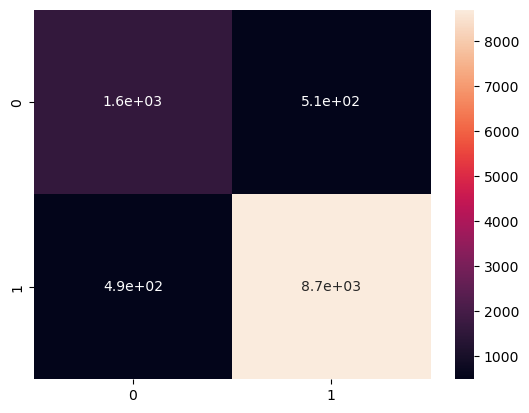

In [332]:
## Testing
ytest_pred = xgb_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

## XGBBoost with hyperparameter tunning


In [335]:
hyp = {"n_estimators":np.arange(10,100),
       "learning_rate": np.arange(0.01,1,0.01)
}

In [337]:
rscv_xgb = RandomizedSearchCV(xgb_clf_model, hyp, cv = 5)
rscv_xgb = rscv_xgb.fit(xtrain, ytrain)
rscv_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.87, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=97, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [338]:
rscv_xgb_clf_model = rscv_xgb.fit(xtrain,ytrain)
rscv_xgb_clf_model

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

Accuracy = 0.9639673599716174
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8478
           1       0.98      0.98      0.98     36620

    accuracy                           0.96     45098
   macro avg       0.94      0.94      0.94     45098
weighted avg       0.96      0.96      0.96     45098

Axes(0.125,0.11;0.62x0.77)


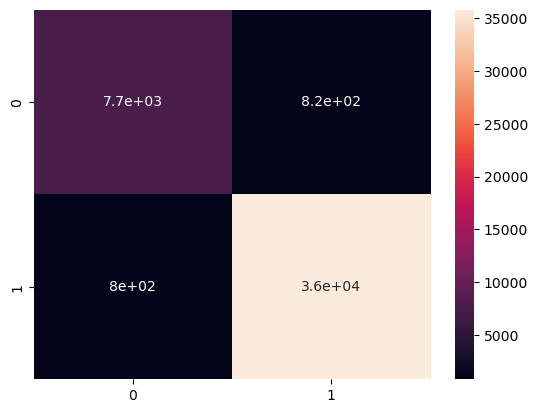

In [339]:
## Traning 

ytrain_pred = rscv_xgb_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.9168957871396896
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2100
           1       0.95      0.95      0.95      9175

    accuracy                           0.92     11275
   macro avg       0.86      0.87      0.86     11275
weighted avg       0.92      0.92      0.92     11275

Axes(0.125,0.11;0.62x0.77)


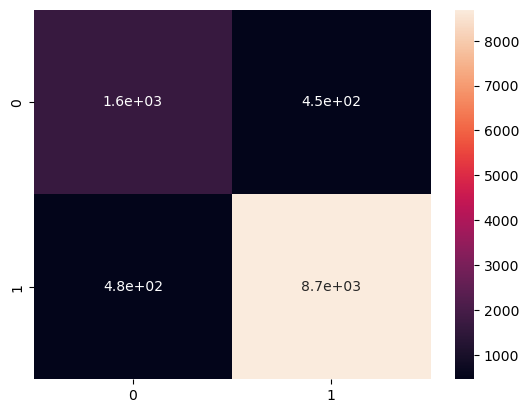

In [340]:
## Testing

ytest_pred = rscv_xgb_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

### Algorithm 6 : SVM Algorithm

In [342]:
svc = SVC()
svc_model = svc.fit(xtrain,ytrain)
svc_model

SVC()

In [343]:
ytrain_pred = svc_model.predict(xtrain)

## Model Evaluation for Training Data

In [345]:
#for training data
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*50)

cnf_mat = confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("*"*50)


clf_rep = classification_report(ytrain,ytrain_pred)
print("Classification Report : \n",clf_rep)

Accuracy : 0.836223335846379
**************************************************
Confusion Matrix : 
[[ 3144  5334]
 [ 2052 34568]]
**************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.37      0.46      8478
           1       0.87      0.94      0.90     36620

    accuracy                           0.84     45098
   macro avg       0.74      0.66      0.68     45098
weighted avg       0.82      0.84      0.82     45098



In [346]:
ytest_pred = svc_model.predict(xtest)

## Model Evalution for Testing Data 

In [348]:
#for testing data
acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("*"*50)

cnf_mat = confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("*"*50)


clf_rep = classification_report(ytest,ytest_pred)
print("Classification Report : \n",clf_rep)

Accuracy : 0.8337028824833703
**************************************************
Confusion Matrix : 
[[ 740 1360]
 [ 515 8660]]
**************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.35      0.44      2100
           1       0.86      0.94      0.90      9175

    accuracy                           0.83     11275
   macro avg       0.73      0.65      0.67     11275
weighted avg       0.81      0.83      0.82     11275



## Algorithm : 7 KNN ( k Nearest Neighbours )

In [350]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf

KNeighborsClassifier()

In [351]:
knn_clf_model = knn_clf.fit(xtrain,ytrain)
knn_clf_model

KNeighborsClassifier()

In [352]:
ypred_train = knn_clf_model.predict(xtrain)

## Model Evaluation for Training Data

Accuracy =  0.8824559847443345
              precision    recall  f1-score   support

           0       0.76      0.55      0.64      8478
           1       0.90      0.96      0.93     36620

    accuracy                           0.88     45098
   macro avg       0.83      0.75      0.78     45098
weighted avg       0.88      0.88      0.87     45098



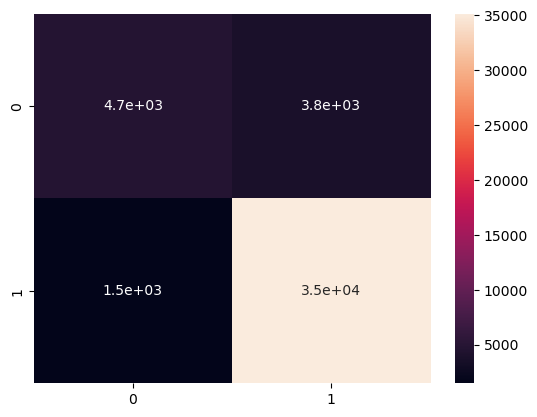

In [354]:
## Training

print("Accuracy = ",accuracy_score(ytrain,ypred_train))
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True)
print(classification_report(ytrain,ypred_train))

In [355]:
ytest_pred = knn_clf_model.predict(xtest)

## Model Evaluation for Testing Data

Accuracy = 0.8418625277161863
              precision    recall  f1-score   support

           0       0.60      0.45      0.51      2100
           1       0.88      0.93      0.91      9175

    accuracy                           0.84     11275
   macro avg       0.74      0.69      0.71     11275
weighted avg       0.83      0.84      0.83     11275



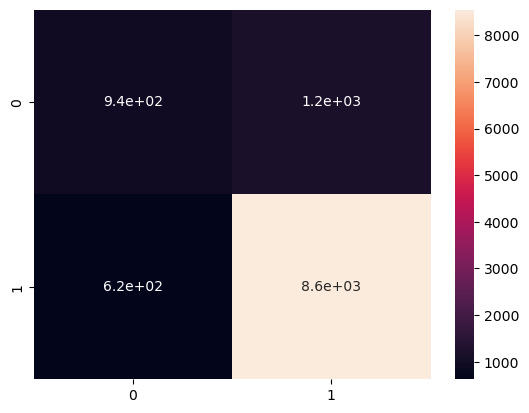

In [357]:
#testing
ypred_test = knn_clf_model.predict(xtest)
print(f"Accuracy = {accuracy_score(ytest,ypred_test)}")
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True)
print(classification_report(ytest,ypred_test))

In [358]:
training_accuracy = []
testing_accuracy = []


for k in np.arange(2,20):
    knn_clf = KNeighborsClassifier(k)
    knn_clf_model = knn_clf.fit(xtrain,ytrain)

   # Training Data Evaluation
    y_pred_train = knn_clf_model.predict(xtrain)

    cnf_matrix = confusion_matrix(ytrain, y_pred_train)
    print("Confusion Matrix :\n",cnf_matrix)
    print("*"*60)

    accuracy = accuracy_score(ytrain, y_pred_train)
    print("Accuracy :",accuracy)
    print("*"*60)

    clf_report = classification_report(ytrain, y_pred_train)
    print("Classification Report :\n",clf_report)
    
    training_accuracy.append(accuracy)
    
    # Testing Data Evaluation
    ypred = knn_clf_model.predict(xtest)

    cnf_matrix = confusion_matrix(ytest, ypred)
    print("Confusion Matrix :\n",cnf_matrix)
    print("*"*60)

    accuracy = accuracy_score(ytest, ypred)
    print("Accuracy :",accuracy)
    print("*"*60)

    clf_report = classification_report(ytest, ypred)
    print("Classification Report :\n",clf_report)

    testing_accuracy.append(accuracy)

Confusion Matrix :
 [[ 8478     0]
 [ 2597 34023]]
************************************************************
Accuracy : 0.9424142977515633
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      8478
           1       1.00      0.93      0.96     36620

    accuracy                           0.94     45098
   macro avg       0.88      0.96      0.92     45098
weighted avg       0.96      0.94      0.95     45098

Confusion Matrix :
 [[1866  234]
 [1312 7863]]
************************************************************
Accuracy : 0.8628824833702883
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.89      0.71      2100
           1       0.97      0.86      0.91      9175

    accuracy                           0.86     11275
   

## KNN ( k Nearest Neighbours ) with hyperparameter tunning

In [360]:
hyp = {
    "n_neighbors":np.arange(2,20),
    "p" : [1,2]
}

rscv_knn_clf_model = RandomizedSearchCV(knn_clf_model, hyp, cv = 6)
rscv_knn_clf_model.fit(xtrain,ytrain)
rscv_knn_clf_model.best_estimator_

KNeighborsClassifier(n_neighbors=2, p=1)

In [361]:
knn_clf = KNeighborsClassifier(n_neighbors=14)
knn_clf

KNeighborsClassifier(n_neighbors=14)

In [363]:
knn_clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=14)

In [364]:
# Testing Data Evaluation
ypred = knn_clf.predict(xtest)

cnf_matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytest, ypred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytest, ypred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 792 1308]
 [ 563 8612]]
************************************************************
Accuracy : 0.8340576496674058
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.58      0.38      0.46      2100
           1       0.87      0.94      0.90      9175

    accuracy                           0.83     11275
   macro avg       0.73      0.66      0.68     11275
weighted avg       0.82      0.83      0.82     11275



In [365]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(xtrain)

cnf_matrix = confusion_matrix(ytrain, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytrain, y_pred_train)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytrain, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 3692  4786]
 [ 1921 34699]]
************************************************************
Accuracy : 0.8512794358951616
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.66      0.44      0.52      8478
           1       0.88      0.95      0.91     36620

    accuracy                           0.85     45098
   macro avg       0.77      0.69      0.72     45098
weighted avg       0.84      0.85      0.84     45098



Text(0.5, 0, 'K values')

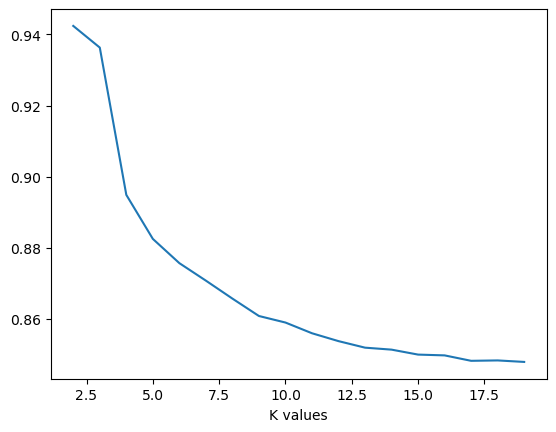

In [366]:
k = np.arange(2, 20)
sns.lineplot(x=k,y=training_accuracy)
plt.xlabel("K values")

Text(0.5, 0, 'K values')

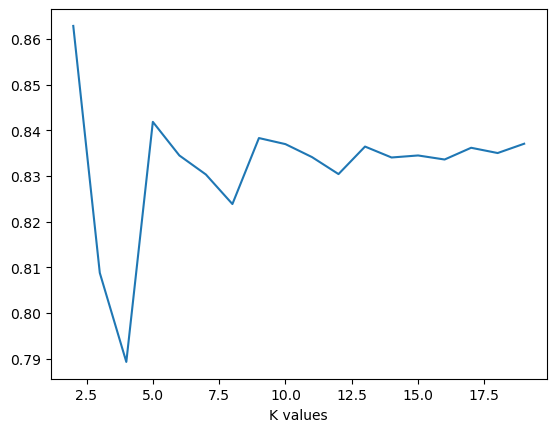

In [367]:
k = np.arange(2, 20)
sns.lineplot(x=k,y=testing_accuracy)
plt.xlabel("K values")

## Algorithm : 8 Naive Bayes

In [390]:
bnb_clf = BernoulliNB ()
bnb_clf

BernoulliNB()

In [392]:
bnb_clf_model = bnb_clf.fit(xtrain,ytrain)
bnb_clf_model

BernoulliNB()

In [394]:
ypred_train = bnb_clf_model.predict(xtrain)

## Model Evaluation for Training Data


Accuracy =  0.8120094017473058
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8478
           1       0.81      1.00      0.90     36620

    accuracy                           0.81     45098
   macro avg       0.41      0.50      0.45     45098
weighted avg       0.66      0.81      0.73     45098



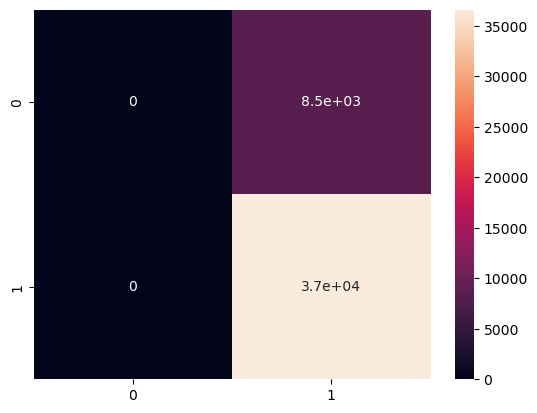

In [397]:
## Training

print("Accuracy = ",accuracy_score(ytrain,ypred_train))
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True)
print(classification_report(ytrain,ypred_train))

In [399]:
ytest_pred = bnb_clf_model.predict(xtest)

Accuracy = 0.8137472283813747
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2100
           1       0.81      1.00      0.90      9175

    accuracy                           0.81     11275
   macro avg       0.41      0.50      0.45     11275
weighted avg       0.66      0.81      0.73     11275



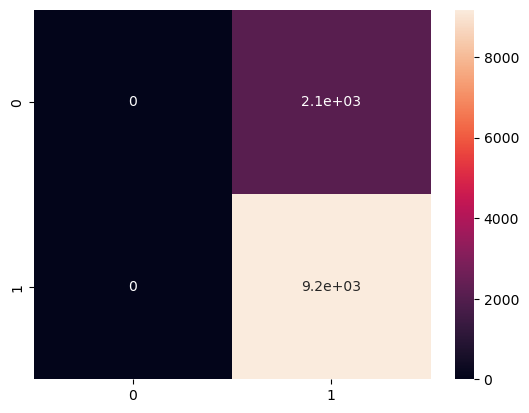

In [401]:
#testing
ypred_test = bnb_clf_model.predict(xtest)
print(f"Accuracy = {accuracy_score(ytest,ypred_test)}")
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True)
print(classification_report(ytest,ypred_test))

## Save model in pickle file

In [404]:
import pickle

In [406]:
with open("bank_marketing_predictionmodel.pkl","wb") as f:
    pickle.dump(rf_clf_model,f)

In [408]:
with open("bank_marketing_predictionmodel.pkl","rb") as f:
    model = pickle.load(f)

## Prediction

In [411]:
xtrain.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'poutcome'],
      dtype='object')

In [189]:
def Prediction(age, job,marital,education,default,balance,housing,
       loan,contact,day,month,duration,campaign,pdays,poutcome):
    
    test_data = {
        "age": [age],
      "job": [job],
       "marital":[marital],
        "education": [education],
         "default": [default],
         "balance":[balance],
         "housing": [housing],
         "loan": [loan],
         "contact":[contact],
         "day": [day],
         "month": [month],
         "duration": [duration],
         "campaign":[campaign],
         "pdays": [pdays],
         "poutcome": [poutcome],
                }  
    
    test_df = pd.DataFrame(test_data)
    print(test_df)

    with open("bank_marketing_predictionmodel.pkl","rb") as f:
      model = pickle.load(f)
    
    return f"Deposit Term =  {model.predict(test_df)[0]}"

In [191]:
xtrain.head(2)

age  job  marital  education  default  balance  housing  loan  contact  \
6211    42    1        1          3        0     1547        1     2        1   
12005   39    6        1          1        0       72        1     1        1   

       day  month  duration  campaign  pdays  poutcome  
6211    27      5       272         3     -1         1  
12005    7      5       425         6     -1         1

In [420]:
ytrain.head(1)

6211    1
Name: deposit, dtype: int64

In [421]:
Prediction(30,	6,	1,	1,	0,	-28,	1,	1,	2,	18.0,	5,	284,	2,	-1,	3)

'Deposit Term = 2'

In [422]:
Prediction(38,	8,	2,	1,	0,	473	,1,	2,	1,	30.0,	5,	133,	4,	-1,	1)

'Deposit Term = 2'

In [423]:
df.shape

(56373, 15)

## Challenges 

Low Subscription Rate: Only about 19% of the people contacted by the bank actually signed up for a term deposit. This means most of the marketing efforts didn’t lead to a subscription.

Age Matters: Middle-aged people (30-50 years) are more likely to sign up. Younger and older people might need different marketing approaches.

Financial Stability Helps: People with higher bank balances are more likely to subscribe. Those who are in debt or have lower balances are less likely to be interested.

Loan Status: People without loans (housing or personal) seem to have more money available for things like term deposits.

Longer Conversations Work: If a call with a client lasts longer, they are more likely to sign up. Short conversations might not be as effective.

Too Many Calls Can Backfire: Repeatedly calling people doesn’t always help. After a few calls, the chances of getting them to sign up don’t increase much.

Past Success Helps: If a client had a positive outcome in a previous campaign, they’re more likely to sign up again.

Best Time to Call: The time of year and day of the month when clients are contacted can influence their decision to sign up. Timing matters!

Better Contact Methods: Some ways of contacting people (like personal calls) work better than others. Using the right method can make a big difference.